# MTF and DQE in Electron Microscopy: A Practical Introduction

The Modulation Transfer Function (MTF) and Detective Quantum Efficiency (DQE) are crucial metrics for evaluating the performance of imaging systems in electron microscopy.
When we talk about transforming an image to the frequency domain, we're referring to decomposing it into its constituent spatial frequencies using mathematical techniques like the Fourier Transform. This allows us to analyze how well the microscope system preserves different spatial frequencies (details) from the specimen to the final image.

**MTF** measures how faithfully the imaging system transfers contrast from the specimen to the image across different spatial frequencies. A perfect imaging system would have an MTF of 1 at all frequencies, but real systems show a decline at higher frequencies (finer details).

**DQE** measures the efficiency with which the detector converts incoming electrons into useful signal, accounting for noise. It's essentially a signal-to-noise ratio normalized to the input signal and is frequency-dependent.

## Measuring MTF and DQE in 1D Pixelated Sensors (Line CCDs)


Linear (1D) pixelated sensors such as line CCDs (Charge-Coupled Devices) are used in various applications including spectroscopy, document scanning, and industrial machine vision. Properly characterizing these sensors requires measuring two key performance metrics:

1. **Modulation Transfer Function (MTF)** - Describes how well the sensor preserves contrast across different spatial frequencies
2. **Detective Quantum Efficiency (DQE)** - Measures the combined effects of signal and noise performance compared to an ideal detector

This guide explains the principles behind these metrics and outlines practical measurement procedures.

## Understanding MTF

The Modulation Transfer Function quantifies how faithfully a sensor reproduces contrast at different spatial frequencies. It essentially describes the spatial frequency response of the imaging system.

### Key Concepts

- MTF is typically normalized to 1 (or 100%) at zero spatial frequency
- MTF decreases with increasing spatial frequency
- The Nyquist frequency (fₙ = 1/(2p), where p is the pixel pitch) represents the theoretical maximum frequency that can be resolved
- The shape of the MTF curve provides insights into sensor performance and potential artifacts

### Theoretical Considerations for 1D Sensors

For a 1D pixelated sensor with rectangular pixels, the theoretical MTF is:

MTF(f) = |sin(πfp)/(πfp)| × sinc(f/fₙ)

Where:
- f is the spatial frequency
- p is the pixel pitch
- fₙ is the Nyquist frequency

## Measuring MTF in Line CCDs

### Method 1: Edge Spread Function (ESF) Approach

1. **Setup**:
   - Place a sharp, straight edge at a slight angle (typically 2-5°) to the pixel array
   - Ensure uniform illumination behind the edge
   - Secure the setup to minimize vibration

2. **Data Acquisition**:
   - Capture multiple frames of the edge
   - Average frames to reduce noise
   - Ensure the edge spans multiple pixels

3. **Analysis**:
   - Extract intensity profiles perpendicular to the edge
   - Combine these profiles to create a super-sampled edge profile
   - Differentiate the ESF to obtain the Line Spread Function (LSF)
   - Apply Fourier Transform to the LSF to obtain the MTF

### Method 2: Sinusoidal Target Method

1. **Setup**:
   - Create or obtain targets with sinusoidal intensity variations of known frequencies
   - Ensure proper alignment with the sensor

2. **Data Acquisition**:
   - Capture images of targets at various frequencies
   - Include frequencies from very low to beyond the Nyquist frequency
   - Maintain consistent illumination

3. **Analysis**:
   - Measure the modulation (contrast) at each frequency
   - Calculate MTF as the ratio of output modulation to input modulation
   - Plot MTF versus spatial frequency

### Method 3: Slanted Slit Method

1. **Setup**:
   - Create a narrow slit (width << pixel pitch)
   - Position it at a slight angle relative to the pixel array

2. **Data Acquisition**:
   - Capture the slit image
   - Ensure high SNR through averaging if necessary

3. **Analysis**:
   - Extract and align intensity profiles
   - Construct super-sampled LSF
   - Apply Fourier Transform to obtain MTF

## Understanding DQE

The Detective Quantum Efficiency measures how efficiently a sensor utilizes incident photons to create a useful signal, accounting for various noise sources.

### Key Concepts

- DQE is defined as the square of the ratio of output SNR to input SNR
- DQE(f) = SNR²ₒᵤₜ(f) / SNR²ᵢₙ(f)
- DQE varies with spatial frequency
- A perfect detector would have DQE = 1 at all frequencies
- Real sensors have DQE < 1, decreasing with frequency

## Measuring DQE in Line CCDs

### Prerequisites

- Knowledge of incident photon flux
- Accurate determination of system gain (electrons per ADU)
- Measured MTF
- Noise power spectrum

### Procedure

1. **System Gain Calibration**:
   - Perform photon transfer curve measurements
   - Plot variance vs. mean signal level
   - Calculate gain as slope of the linear region

2. **Input SNR Determination**:
   - Measure incident photon flux using calibrated photodiode
   - Calculate input SNR based on Poisson statistics (SNRᵢₙ = √N, where N is the number of incident photons)

3. **Output SNR Measurement**:
   - Capture flat-field images at various exposure levels
   - Calculate output SNR as signal mean divided by standard deviation
   - Transform to frequency domain to get SNR(f)

4. **Noise Power Spectrum (NPS) Measurement**:
   - Acquire multiple flat-field images
   - Compute Fourier Transforms of difference images
   - Average power spectra to obtain NPS

5. **DQE Calculation**:
   - DQE(f) = MTF²(f) × Signal / (NPS(f) × q)
   - Where q is the average number of incident quanta per pixel

## Practical Considerations

### Equipment Requirements

- Stable light source with known spectrum
- Precision translation stage
- High-quality edge or slit target
- Light meter or calibrated photodiode
- Temperature control system

### Common Challenges

- **Aliasing**: Can occur when measuring frequencies beyond Nyquist
- **Noise**: Affects accuracy, especially at high frequencies
- **Mechanical stability**: Critical for accurate measurements
- **Non-uniformity**: In illumination or sensor response can impact results

### Data Processing Tips

- Apply windowing functions before Fourier Transform to reduce edge effects
- Use oversampling techniques to improve resolution
- Implement proper noise filtering
- Validate results against theoretical expectations

## Example Measurement Workflow

1. Set up measurement apparatus with stable illumination and precise positioning
2. Calibrate system gain and linearity
3. Measure edge or slit response
4. Process data to extract MTF
5. Measure flat fields at various exposure levels
6. Calculate NPS from flat-field data
7. Determine incident quantum flux
8. Calculate DQE at various frequencies
9. Compare results with specifications and theoretical limits

## Interpretation of Results

### MTF Analysis

- **MTF at Nyquist**: Values of 0.3-0.6 are typical for high-quality sensors
- **MTF shape**: Should ideally follow theoretical predictions
- **Deviations**: May indicate issues with pixel response, crosstalk, or other factors

### DQE Analysis

- **Low-frequency DQE**: Indicates quantum efficiency and conversion gain
- **High-frequency DQE**: Reflects spatial resolution capabilities
- **DQE bandwidth**: Width of useful frequency response

## Conclusion

Accurate measurement of MTF and DQE provides crucial information about sensor performance that goes beyond simple resolution specifications. These metrics allow for meaningful comparisons between different sensors and help identify the limiting factors in imaging performance.

For line CCDs specifically, these measurements can reveal important characteristics like pixel crosstalk, readout noise effects, and frequency response limitations that directly impact application performance in spectroscopy, scanning, and machine vision systems.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.fft import fft2, fftshift, ifft2, ifftshift
from skimage import exposure
from skimage import io
from numpy.random import poisson

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Understanding the Frequency Domain

In electron microscopy, we often analyze images in the frequency domain to better understand how information is transferred through the imaging system. This section demonstrates how different spatial patterns transform into the frequency domain using the Fourier transform, showing how regular structures in real space become distinct patterns in frequency space.


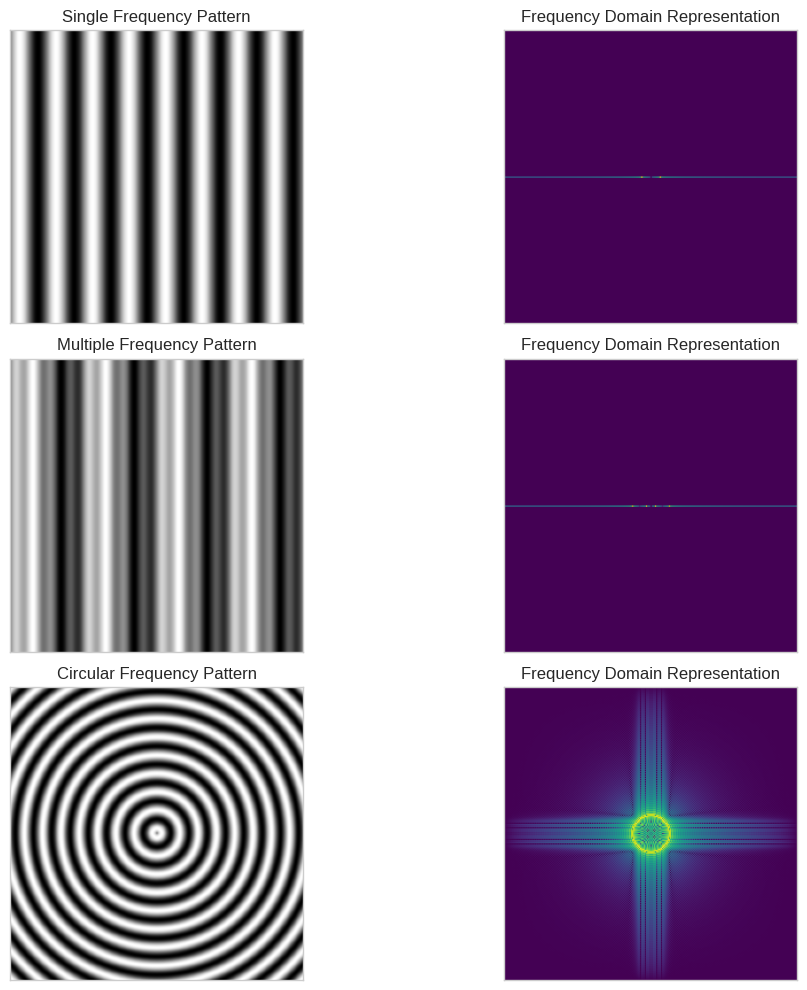

Note how a single-frequency sine wave appears as two bright dots in the Fourier domain.
The multiple frequency pattern shows additional dots at different distances from the center.
The circular pattern transforms into rings in the frequency domain.

The distance from the center represents frequency (higher = finer details).
The brightness represents the amplitude of that frequency component.


In [2]:
def plot_frequency_domain():
    """Demonstrate transformation of simple patterns to frequency domain"""
    
    # Create some test patterns
    size = 256
    x = np.linspace(-4, 4, size)
    y = np.linspace(-4, 4, size)
    X, Y = np.meshgrid(x, y)
    
    # Pattern 1: Single frequency sine wave
    frequency = 8  # cycles across the image
    sine_pattern = np.sin(2 * np.pi * frequency * X / 8)
    
    # Pattern 2: Multiple frequency pattern
    multi_freq = np.sin(2 * np.pi * 4 * X / 8) + 0.5 * np.sin(2 * np.pi * 16 * X / 8)
    
    # Pattern 3: Circular pattern (like a zone plate)
    circle_pattern = np.sin(2 * np.pi * np.sqrt(X**2 + Y**2) / 0.5)
    
    # Transform patterns to frequency domain
    sine_fft = fftshift(fft2(sine_pattern))
    multi_fft = fftshift(fft2(multi_freq))
    circle_fft = fftshift(fft2(circle_pattern))
    
    # Plot in spatial and frequency domains
    fig, axs = plt.subplots(3, 2, figsize=(12, 10))
    
    axs[0, 0].imshow(sine_pattern, cmap='gray')
    axs[0, 0].set_title('Single Frequency Pattern')
    axs[0, 0].set_xticks([])
    axs[0, 0].set_yticks([])
    
    axs[0, 1].imshow(np.log1p(np.abs(sine_fft)), cmap='viridis')
    axs[0, 1].set_title('Frequency Domain Representation')
    axs[0, 1].set_xticks([])
    axs[0, 1].set_yticks([])
    
    axs[1, 0].imshow(multi_freq, cmap='gray')
    axs[1, 0].set_title('Multiple Frequency Pattern')
    axs[1, 0].set_xticks([])
    axs[1, 0].set_yticks([])
    
    axs[1, 1].imshow(np.log1p(np.abs(multi_fft)), cmap='viridis')
    axs[1, 1].set_title('Frequency Domain Representation')
    axs[1, 1].set_xticks([])
    axs[1, 1].set_yticks([])
    
    axs[2, 0].imshow(circle_pattern, cmap='gray')
    axs[2, 0].set_title('Circular Frequency Pattern')
    axs[2, 0].set_xticks([])
    axs[2, 0].set_yticks([])
    
    axs[2, 1].imshow(np.log1p(np.abs(circle_fft)), cmap='viridis')
    axs[2, 1].set_title('Frequency Domain Representation')
    axs[2, 1].set_xticks([])
    axs[2, 1].set_yticks([])
    
    plt.tight_layout()
    plt.show()
    
    print("Note how a single-frequency sine wave appears as two bright dots in the Fourier domain.")
    print("The multiple frequency pattern shows additional dots at different distances from the center.")
    print("The circular pattern transforms into rings in the frequency domain.")
    print("\nThe distance from the center represents frequency (higher = finer details).")
    print("The brightness represents the amplitude of that frequency component.")

# Execute the function
plot_frequency_domain()

## 2. Simulating a Simple Imaging System with MTF

The Modulation Transfer Function (MTF) describes how well an imaging system preserves contrast at different spatial frequencies. Here we simulate how MTF affects image quality, demonstrating that high-frequency information (fine details) is typically attenuated more than low-frequency information (coarse features).

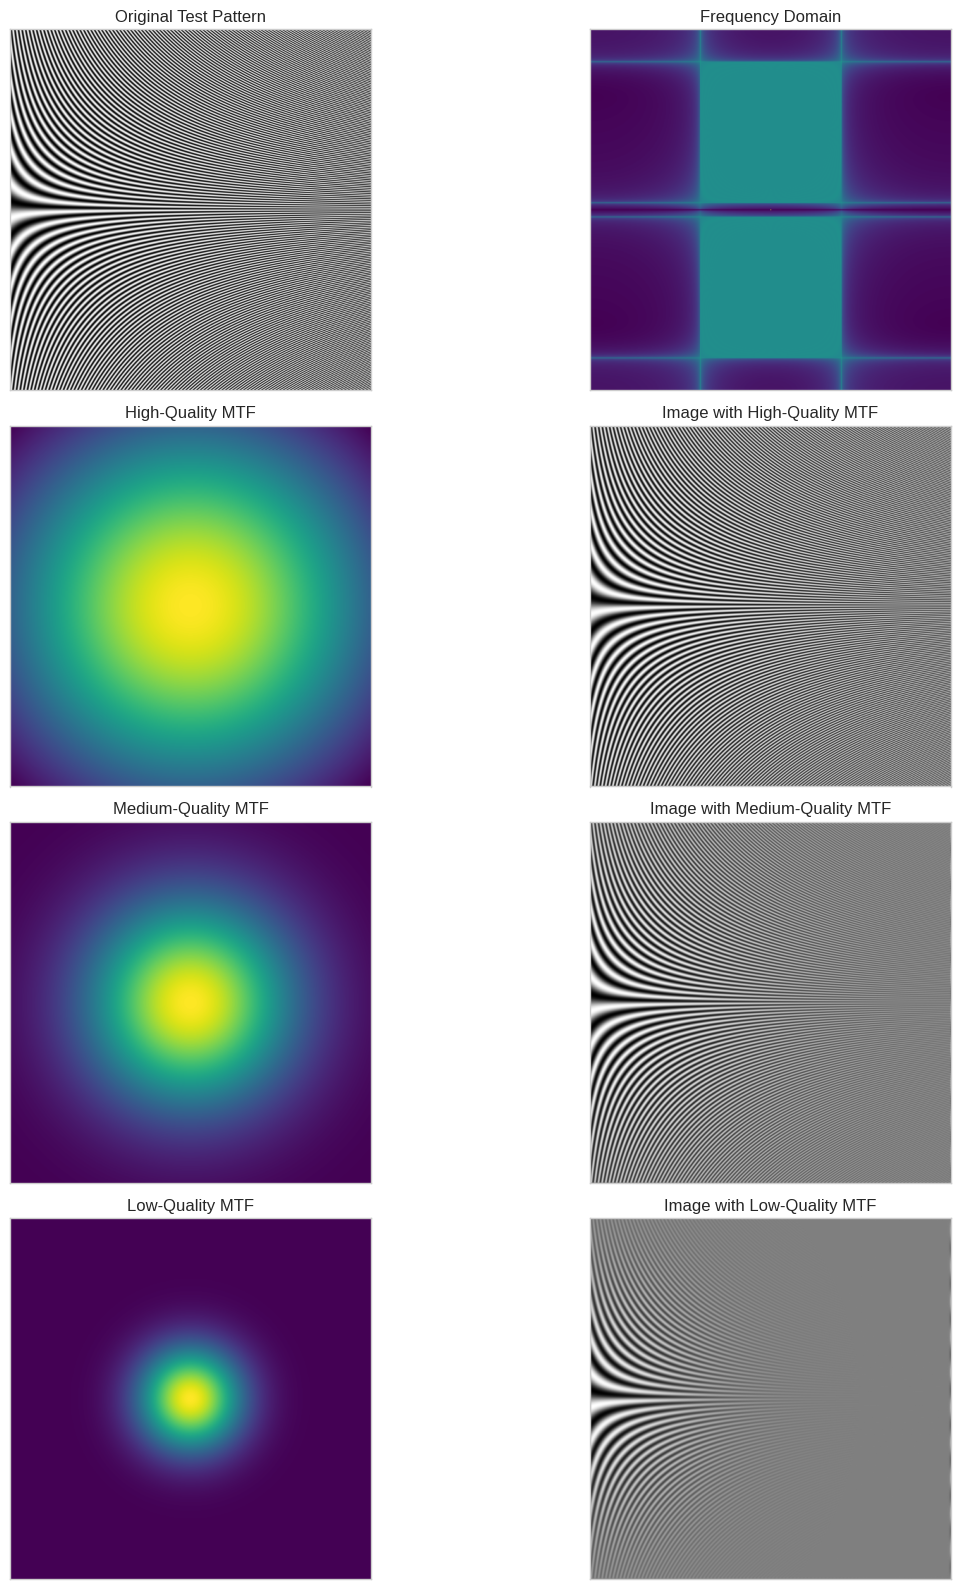

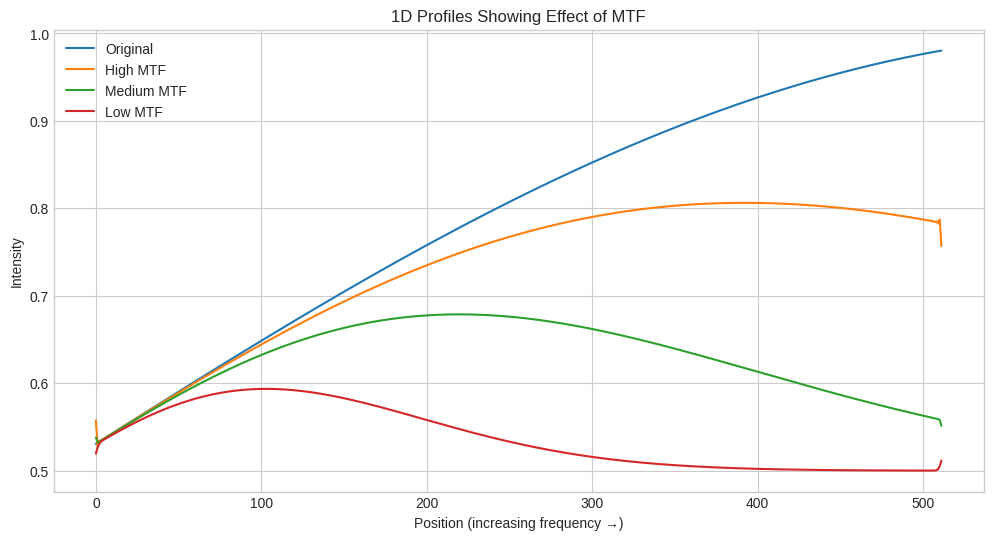

The MTF acts as a frequency filter in the imaging system.
Notice how higher frequencies (finer details on the right side) are more affected.
A good imaging system (high MTF) preserves more of the high-frequency details.


In [3]:

def simulate_imaging_with_mtf():
    """Demonstrate the effects of MTF on image quality"""
    
    # Create a test pattern with a range of spatial frequencies
    size = 512
    x = np.linspace(-10, 10, size)
    y = np.linspace(-10, 10, size)
    X, Y = np.meshgrid(x, y)
    
    # Create a pattern that has increasing frequency from left to right
    test_pattern = np.zeros((size, size))
    for i in range(size):
        frequency = 0.5 + (i / size) * 10  # frequency increases with column index
        test_pattern[:, i] = 0.5 + 0.5 * np.sin(2 * np.pi * frequency * y)
    
    # Transform to frequency domain
    pattern_fft = fftshift(fft2(test_pattern))
    
    # Create MTF functions with different cutoff frequencies
    def create_mtf(cutoff_freq):
        freq_x = np.linspace(-size/2, size/2, size) / size
        freq_y = np.linspace(-size/2, size/2, size) / size
        FX, FY = np.meshgrid(freq_x, freq_y)
        freq_radius = np.sqrt(FX**2 + FY**2)
        
        # Gaussian MTF model
        mtf = np.exp(-(freq_radius**2) / (2 * cutoff_freq**2))
        return mtf
    
    # Apply MTFs with different cutoffs
    mtf_high = create_mtf(0.4)  # Good MTF
    mtf_medium = create_mtf(0.2)  # Medium MTF
    mtf_low = create_mtf(0.1)  # Poor MTF
    
    # Apply MTFs in frequency domain
    result_high = ifft2(ifftshift(pattern_fft * mtf_high)).real
    result_medium = ifft2(ifftshift(pattern_fft * mtf_medium)).real
    result_low = ifft2(ifftshift(pattern_fft * mtf_low)).real
    
    # Plot original pattern and results with different MTFs
    fig, axs = plt.subplots(4, 2, figsize=(14, 16))
    
    # Original pattern
    axs[0, 0].imshow(test_pattern, cmap='gray')
    axs[0, 0].set_title('Original Test Pattern')
    axs[0, 0].set_xticks([])
    axs[0, 0].set_yticks([])
    
    # Frequency domain of original
    axs[0, 1].imshow(np.log1p(np.abs(pattern_fft)), cmap='viridis')
    axs[0, 1].set_title('Frequency Domain')
    axs[0, 1].set_xticks([])
    axs[0, 1].set_yticks([])
    
    # Different MTFs and their effects
    axs[1, 0].imshow(mtf_high, cmap='viridis')
    axs[1, 0].set_title('High-Quality MTF')
    axs[1, 0].set_xticks([])
    axs[1, 0].set_yticks([])
    
    axs[1, 1].imshow(result_high, cmap='gray')
    axs[1, 1].set_title('Image with High-Quality MTF')
    axs[1, 1].set_xticks([])
    axs[1, 1].set_yticks([])
    
    axs[2, 0].imshow(mtf_medium, cmap='viridis')
    axs[2, 0].set_title('Medium-Quality MTF')
    axs[2, 0].set_xticks([])
    axs[2, 0].set_yticks([])
    
    axs[2, 1].imshow(result_medium, cmap='gray')
    axs[2, 1].set_title('Image with Medium-Quality MTF')
    axs[2, 1].set_xticks([])
    axs[2, 1].set_yticks([])
    
    axs[3, 0].imshow(mtf_low, cmap='viridis')
    axs[3, 0].set_title('Low-Quality MTF')
    axs[3, 0].set_xticks([])
    axs[3, 0].set_yticks([])
    
    axs[3, 1].imshow(result_low, cmap='gray')
    axs[3, 1].set_title('Image with Low-Quality MTF')
    axs[3, 1].set_xticks([])
    axs[3, 1].set_yticks([])
    
    plt.tight_layout()
    plt.show()
    
    # Plot 1D profiles to better see the effect
    plt.figure(figsize=(12, 6))
    row = size // 2
    plt.plot(test_pattern[row, :], label='Original')
    plt.plot(result_high[row, :], label='High MTF')
    plt.plot(result_medium[row, :], label='Medium MTF')
    plt.plot(result_low[row, :], label='Low MTF')
    plt.legend()
    plt.title('1D Profiles Showing Effect of MTF')
    plt.xlabel('Position (increasing frequency →)')
    plt.ylabel('Intensity')
    plt.show()
    
    print("The MTF acts as a frequency filter in the imaging system.")
    print("Notice how higher frequencies (finer details on the right side) are more affected.")
    print("A good imaging system (high MTF) preserves more of the high-frequency details.")

# Execute the function
simulate_imaging_with_mtf()

## 3. Understanding and Measuring MTF - Memory-Optimized Version

The knife-edge method is a standard technique for measuring MTF. By imaging a sharp edge, we can derive the Edge Spread Function (ESF), differentiate to obtain the Line Spread Function (LSF), and finally calculate the MTF through Fourier transformation. This section walks through this process step by step.

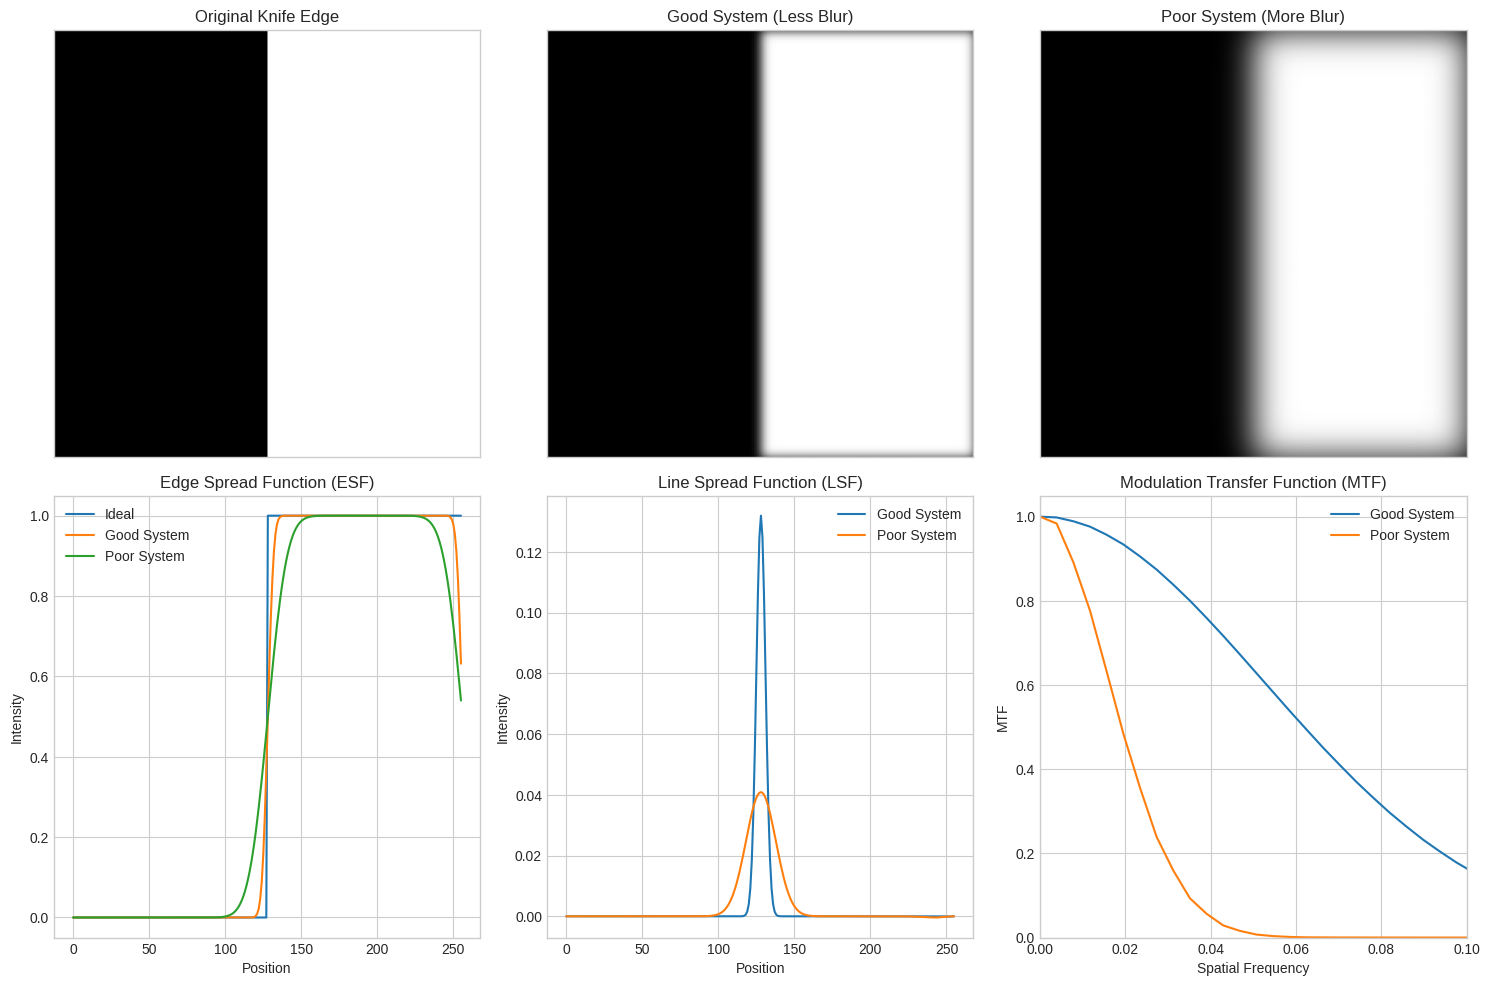

In [18]:
def simulate_knife_edge_measurement():
    """Simulate knife-edge method for MTF measurement with memory optimization"""
    
    # Create a knife-edge (step function) image with a smaller size
    size = 256
    knife_edge = np.zeros((size, size))
    knife_edge[:, size//2:] = 1
    
    # Create MTFs with different quality
    x = np.linspace(-size/2, size/2, size)
    sigma_good = 3
    sigma_poor = 10
    
    # Create PSFs (Point Spread Functions) - 1D to save memory
    psf_good = np.exp(-x**2 / (2 * sigma_good**2))
    psf_poor = np.exp(-x**2 / (2 * sigma_poor**2))
    psf_good = psf_good / np.sum(psf_good)  # Normalize
    psf_poor = psf_poor / np.sum(psf_poor)  # Normalize
    
    # Apply PSFs to knife-edge using separate 1D convolutions
    knife_edge_good_h = np.zeros_like(knife_edge)
    knife_edge_poor_h = np.zeros_like(knife_edge)
    
    for i in range(size):
        knife_edge_good_h[i] = np.convolve(knife_edge[i], psf_good, mode='same')
        knife_edge_poor_h[i] = np.convolve(knife_edge[i], psf_poor, mode='same')
    
    # Then convolve vertically
    knife_edge_good = np.zeros_like(knife_edge)
    knife_edge_poor = np.zeros_like(knife_edge)
    
    for j in range(size):
        knife_edge_good[:, j] = np.convolve(knife_edge_good_h[:, j], psf_good, mode='same')
        knife_edge_poor[:, j] = np.convolve(knife_edge_poor_h[:, j], psf_poor, mode='same')
    
    # Calculate Edge Spread Function (ESF) - average along the edge
    esf_ideal = knife_edge[size//2, :]
    esf_good = knife_edge_good[size//2, :]
    esf_poor = knife_edge_poor[size//2, :]
    
    # Calculate Line Spread Function (LSF) - derivative of ESF
    lsf_good = np.gradient(esf_good)
    lsf_poor = np.gradient(esf_poor)
    
    # Apply a window function to reduce edge effects
    window = np.hanning(size)
    lsf_good = lsf_good * window
    lsf_poor = lsf_poor * window
    
    # Normalize LSFs (area under curve should be 1)
    lsf_good = lsf_good / np.sum(lsf_good)
    lsf_poor = lsf_poor / np.sum(lsf_poor)
    
    # Calculate MTF properly
    mtf_good = np.abs(np.fft.fft(lsf_good))
    mtf_poor = np.abs(np.fft.fft(lsf_poor))
    
    # Normalize MTF so it starts at 1 for zero frequency
    mtf_good = mtf_good / mtf_good[0]
    mtf_poor = mtf_poor / mtf_poor[0]
    
    # Plot results
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    
    # Plot original and blurred knife edges
    axs[0, 0].imshow(knife_edge, cmap='gray')
    axs[0, 0].set_title('Original Knife Edge')
    axs[0, 0].set_xticks([])
    axs[0, 0].set_yticks([])
    
    axs[0, 1].imshow(knife_edge_good, cmap='gray')
    axs[0, 1].set_title('Good System (Less Blur)')
    axs[0, 1].set_xticks([])
    axs[0, 1].set_yticks([])
    
    axs[0, 2].imshow(knife_edge_poor, cmap='gray')
    axs[0, 2].set_title('Poor System (More Blur)')
    axs[0, 2].set_xticks([])
    axs[0, 2].set_yticks([])
    
    # Plot Edge Spread Functions
    axs[1, 0].plot(esf_ideal, label='Ideal')
    axs[1, 0].plot(esf_good, label='Good System')
    axs[1, 0].plot(esf_poor, label='Poor System')
    axs[1, 0].set_title('Edge Spread Function (ESF)')
    axs[1, 0].legend()
    axs[1, 0].set_xlabel('Position')
    axs[1, 0].set_ylabel('Intensity')
    
    # Plot Line Spread Functions
    axs[1, 1].plot(lsf_good, label='Good System')
    axs[1, 1].plot(lsf_poor, label='Poor System')
    axs[1, 1].set_title('Line Spread Function (LSF)')
    axs[1, 1].legend()
    axs[1, 1].set_xlabel('Position')
    axs[1, 1].set_ylabel('Intensity')
    
    # Plot MTF - only up to Nyquist frequency (size/2)
    frequencies = np.fft.fftfreq(size)[:size//2]
    frequencies = np.abs(frequencies)  # Make sure frequencies are positive
    
    axs[1, 2].plot(frequencies, mtf_good[:size//2], label='Good System')
    axs[1, 2].plot(frequencies, mtf_poor[:size//2], label='Poor System')
    axs[1, 2].set_title('Modulation Transfer Function (MTF)')
    axs[1, 2].legend()
    axs[1, 2].set_xlabel('Spatial Frequency')
    axs[1, 2].set_ylabel('MTF')
    axs[1, 2].set_xlim(0, 0.1)  # Focus on lower frequencies
    axs[1, 2].set_ylim(0, 1.05)  # MTF should be between 0 and 1
    
    plt.tight_layout()
    plt.show()

simulate_knife_edge_measurement()

## 4. Detective Quantum Efficiency (DQE)

DQE measures how efficiently a detector converts incoming electrons into useful signal. A detector with higher DQE produces better signal-to-noise ratio, especially at low electron doses. This section visualizes how DQE affects image quality across different dose conditions.

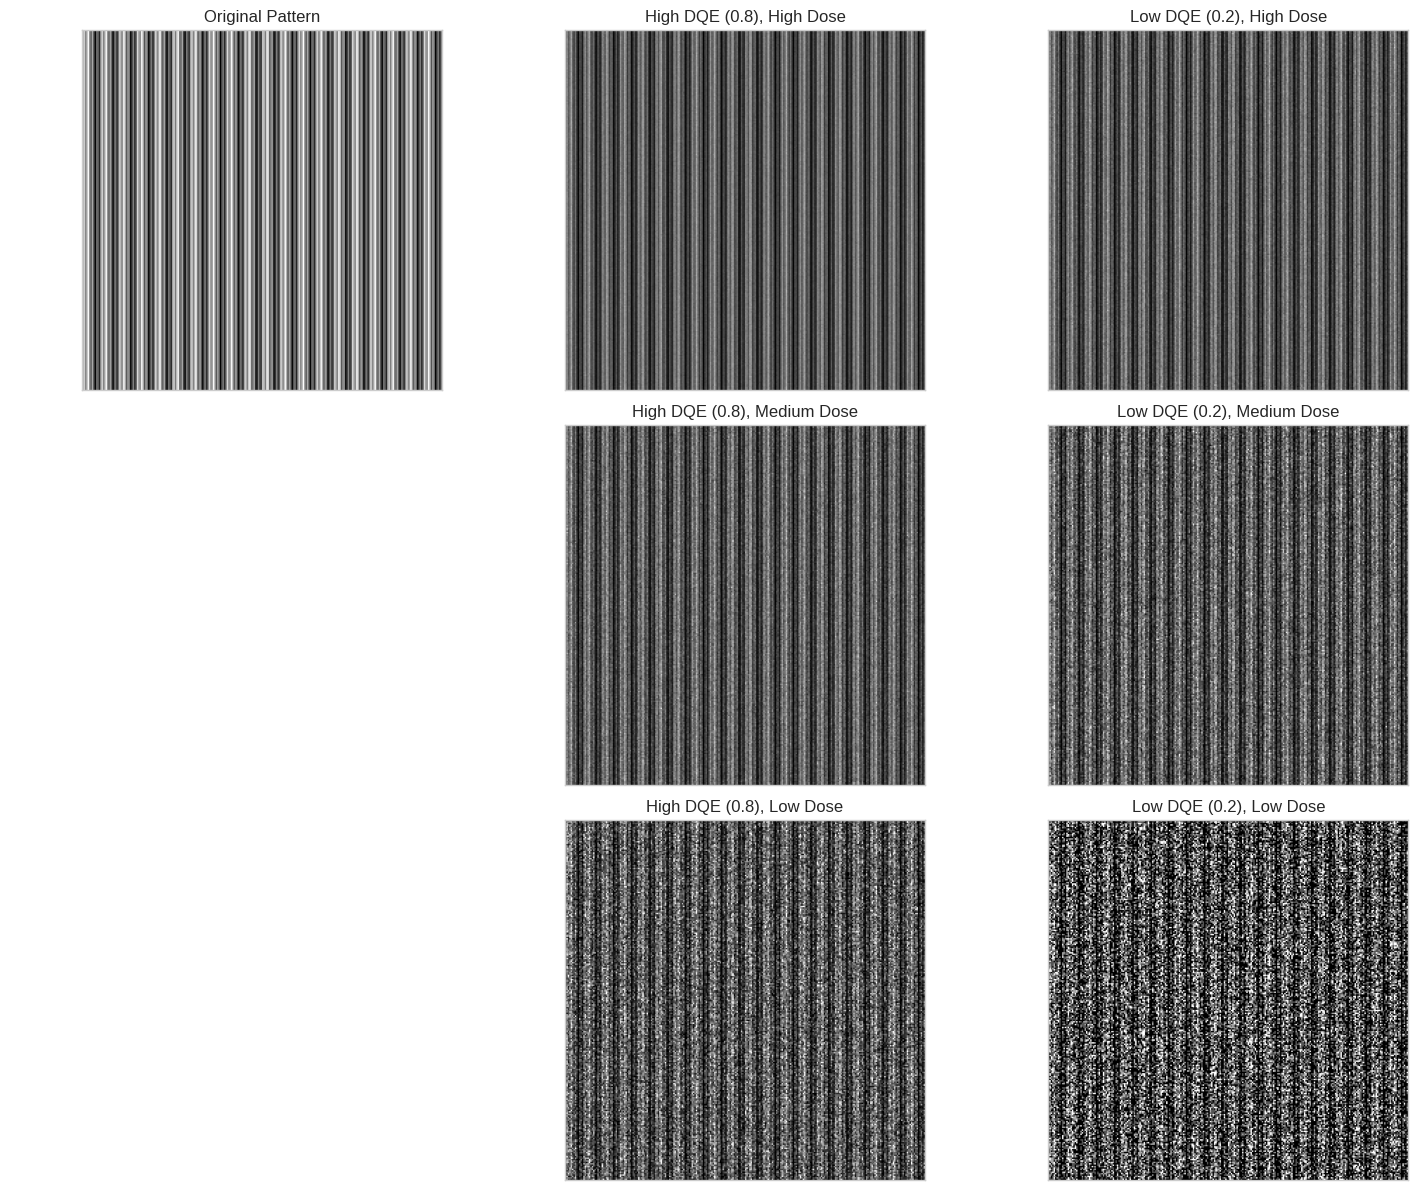

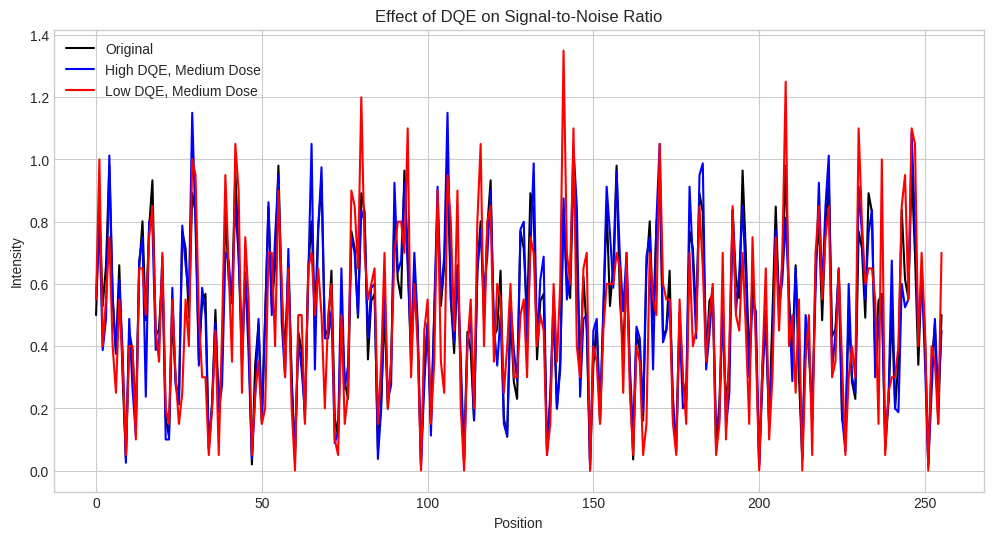

DQE measures the efficiency of the detector in converting electrons to signal.
A high DQE detector (closer to 1.0) produces higher signal-to-noise ratio images.
This is especially important at low electron doses (beam-sensitive samples).

At high doses, even a low DQE detector can produce acceptable images.
But at low doses, a high DQE detector makes a critical difference.


In [5]:

def simulate_dqe():
    """Demonstrate DQE and its impact on image quality"""
    
    # Create a simple test pattern
    size = 256
    x = np.linspace(-5, 5, size)
    y = np.linspace(-5, 5, size)
    X, Y = np.meshgrid(x, y)
    
    # Pattern with two frequencies
    pattern = 0.5 + 0.25 * np.sin(2 * np.pi * 2 * X) + 0.25 * np.sin(2 * np.pi * 8 * X)
    
    # Define electron dose (controls noise level)
    high_dose = 1000   # High electron dose (low noise)
    medium_dose = 100  # Medium electron dose
    low_dose = 10      # Low electron dose (high noise)
    
    # Simulate electron counting with different DQE values
    def simulate_detector(image, dose, dqe_val):
        """Simulate detection with given DQE value"""
        # Scale image to desired electron dose
        scaled_image = image * dose
        
        # Apply DQE effect (reduce effective electrons)
        effective_electrons = scaled_image * dqe_val
        
        # Apply Poisson noise (counting statistics)
        noisy_image = poisson(effective_electrons)
        
        # Normalize back
        result = noisy_image / (dose * dqe_val)
        
        return result
    
    # Simulate detection with different doses and DQE values
    # High DQE (0.8)
    high_dqe_high_dose = simulate_detector(pattern, high_dose, 0.8)
    high_dqe_med_dose = simulate_detector(pattern, medium_dose, 0.8)
    high_dqe_low_dose = simulate_detector(pattern, low_dose, 0.8)
    
    # Low DQE (0.2)
    low_dqe_high_dose = simulate_detector(pattern, high_dose, 0.2)
    low_dqe_med_dose = simulate_detector(pattern, medium_dose, 0.2)
    low_dqe_low_dose = simulate_detector(pattern, low_dose, 0.2)
    
    # Plot results
    fig, axs = plt.subplots(3, 3, figsize=(15, 12))
    
    # Original pattern
    axs[0, 0].imshow(pattern, cmap='gray')
    axs[0, 0].set_title('Original Pattern')
    axs[0, 0].set_xticks([])
    axs[0, 0].set_yticks([])
    
    # High DQE results
    axs[0, 1].imshow(high_dqe_high_dose, cmap='gray', vmin=0, vmax=1.5)
    axs[0, 1].set_title('High DQE (0.8), High Dose')
    axs[0, 1].set_xticks([])
    axs[0, 1].set_yticks([])
    
    axs[0, 2].imshow(low_dqe_high_dose, cmap='gray', vmin=0, vmax=1.5)
    axs[0, 2].set_title('Low DQE (0.2), High Dose')
    axs[0, 2].set_xticks([])
    axs[0, 2].set_yticks([])
    
    axs[1, 1].imshow(high_dqe_med_dose, cmap='gray', vmin=0, vmax=1.5)
    axs[1, 1].set_title('High DQE (0.8), Medium Dose')
    axs[1, 1].set_xticks([])
    axs[1, 1].set_yticks([])
    
    axs[1, 2].imshow(low_dqe_med_dose, cmap='gray', vmin=0, vmax=1.5)
    axs[1, 2].set_title('Low DQE (0.2), Medium Dose')
    axs[1, 2].set_xticks([])
    axs[1, 2].set_yticks([])
    
    axs[2, 1].imshow(high_dqe_low_dose, cmap='gray', vmin=0, vmax=1.5)
    axs[2, 1].set_title('High DQE (0.8), Low Dose')
    axs[2, 1].set_xticks([])
    axs[2, 1].set_yticks([])
    
    axs[2, 2].imshow(low_dqe_low_dose, cmap='gray', vmin=0, vmax=1.5)
    axs[2, 2].set_title('Low DQE (0.2), Low Dose')
    axs[2, 2].set_xticks([])
    axs[2, 2].set_yticks([])
    
    # Empty plots for layout
    axs[1, 0].axis('off')
    axs[2, 0].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Plot line profiles for better comparison
    plt.figure(figsize=(12, 6))
    row = size // 2
    plt.plot(pattern[row, :], 'k-', label='Original')
    plt.plot(high_dqe_med_dose[row, :], 'b-', label='High DQE, Medium Dose')
    plt.plot(low_dqe_med_dose[row, :], 'r-', label='Low DQE, Medium Dose')
    plt.legend()
    plt.title('Effect of DQE on Signal-to-Noise Ratio')
    plt.xlabel('Position')
    plt.ylabel('Intensity')
    plt.show()
    
    print("DQE measures the efficiency of the detector in converting electrons to signal.")
    print("A high DQE detector (closer to 1.0) produces higher signal-to-noise ratio images.")
    print("This is especially important at low electron doses (beam-sensitive samples).")
    print("\nAt high doses, even a low DQE detector can produce acceptable images.")
    print("But at low doses, a high DQE detector makes a critical difference.")

# Execute the function
simulate_dqe()

## 5. Frequency-Dependent DQE

In real detectors, DQE varies with spatial frequency. Typically, DQE is highest at low frequencies and decreases at higher frequencies. This section demonstrates how frequency-dependent DQE affects the preservation of details at different scales in the image.

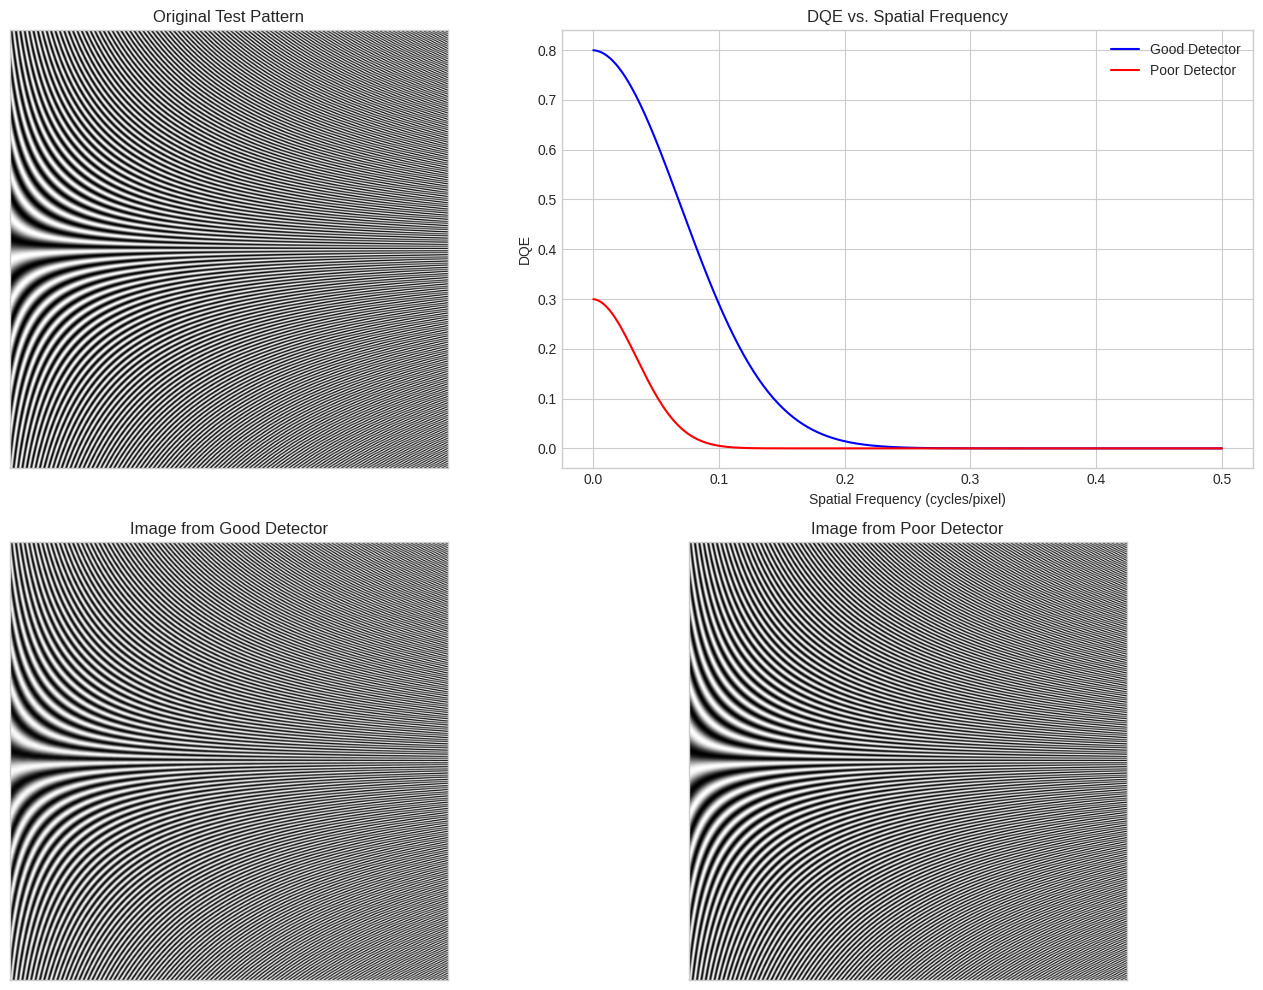

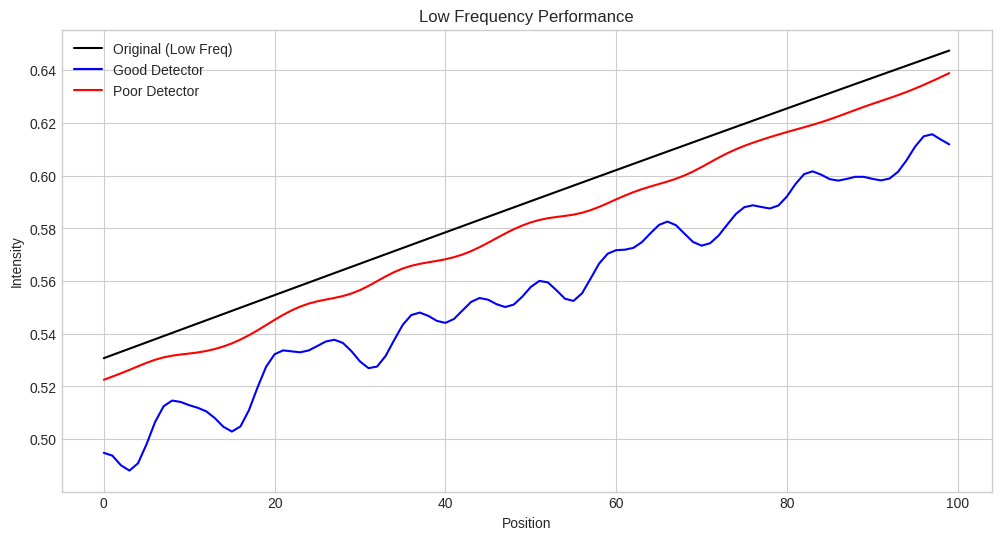

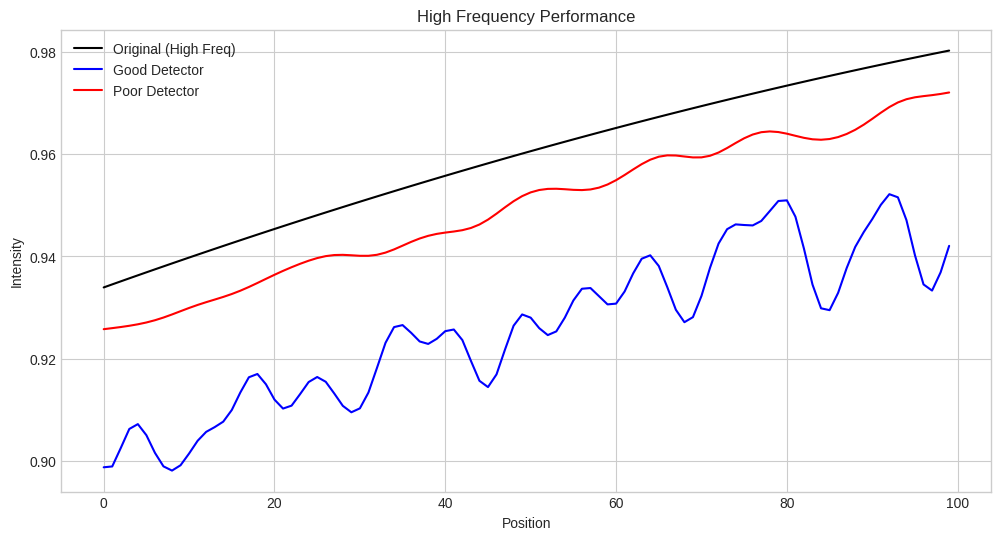

In real detectors, DQE varies with spatial frequency.
Most detectors have higher DQE at low frequencies (large features).
DQE drops at higher frequencies (fine details).

A good detector maintains higher DQE across the frequency spectrum.
This allows it to capture both large features and fine details accurately.
The frequency at which DQE drops to 0.5 is often used as a performance metric.


In [6]:

def simulate_frequency_dependent_dqe():
    """Demonstrate how DQE varies with spatial frequency"""
    
    # Create a test pattern with a range of spatial frequencies
    size = 512
    x = np.linspace(-10, 10, size)
    y = np.linspace(-10, 10, size)
    X, Y = np.meshgrid(x, y)
    
    # Create a pattern that has increasing frequency from left to right
    test_pattern = np.zeros((size, size))
    for i in range(size):
        frequency = 0.5 + (i / size) * 10  # frequency increases with column index
        test_pattern[:, i] = 0.5 + 0.5 * np.sin(2 * np.pi * frequency * y)
    
    # Apply a realistic frequency-dependent DQE
    def apply_frequency_dependent_dqe(image, dose=100):
        """Apply realistic frequency-dependent DQE"""
        # Convert to frequency domain
        img_freq = fftshift(fft2(image))
        
        # Create frequency-dependent DQE function
        freq_x = np.linspace(-0.5, 0.5, size)
        freq_y = np.linspace(-0.5, 0.5, size)
        FX, FY = np.meshgrid(freq_x, freq_y)
        freq_radius = np.sqrt(FX**2 + FY**2)
        
        # Good DQE detector: high at low frequencies, gradually drops
        dqe_good = 0.8 * np.exp(-(freq_radius**2) / 0.1**2)
        
        # Poor DQE detector: lower overall, drops quickly
        dqe_poor = 0.3 * np.exp(-(freq_radius**2) / 0.05**2)
        
        # Apply Poisson noise in frequency domain (simplified)
        noise_factor_good = np.sqrt(dose * dqe_good) / dose
        noise_factor_poor = np.sqrt(dose * dqe_poor) / dose
        
        # Add frequency-dependent noise
        noise_good = np.random.normal(0, noise_factor_good, img_freq.shape)
        noise_poor = np.random.normal(0, noise_factor_poor, img_freq.shape)
        
        # Combine signal and noise
        img_freq_good = img_freq + noise_good * np.abs(img_freq)
        img_freq_poor = img_freq + noise_poor * np.abs(img_freq)
        
        # Transform back to spatial domain
        result_good = np.real(ifft2(ifftshift(img_freq_good)))
        result_poor = np.real(ifft2(ifftshift(img_freq_poor)))
        
        return result_good, result_poor, dqe_good, dqe_poor
    
    # Apply DQE simulation
    result_good, result_poor, dqe_good, dqe_poor = apply_frequency_dependent_dqe(test_pattern)
    
    # Plot results
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    
    # Original pattern
    axs[0, 0].imshow(test_pattern, cmap='gray')
    axs[0, 0].set_title('Original Test Pattern')
    axs[0, 0].set_xticks([])
    axs[0, 0].set_yticks([])
    
    # DQE curves
    center = size // 2
    freq_x = np.linspace(0, 0.5, size//2)
    axs[0, 1].plot(freq_x, dqe_good[center, center:center+size//2], 'b-', label='Good Detector')
    axs[0, 1].plot(freq_x, dqe_poor[center, center:center+size//2], 'r-', label='Poor Detector')
    axs[0, 1].set_title('DQE vs. Spatial Frequency')
    axs[0, 1].set_xlabel('Spatial Frequency (cycles/pixel)')
    axs[0, 1].set_ylabel('DQE')
    axs[0, 1].legend()
    axs[0, 1].grid(True)
    
    # Simulated images
    axs[1, 0].imshow(result_good, cmap='gray')
    axs[1, 0].set_title('Image from Good Detector')
    axs[1, 0].set_xticks([])
    axs[1, 0].set_yticks([])
    
    axs[1, 1].imshow(result_poor, cmap='gray')
    axs[1, 1].set_title('Image from Poor Detector')
    axs[1, 1].set_xticks([])
    axs[1, 1].set_yticks([])
    
    plt.tight_layout()
    plt.show()
    
    # Plot 1D profiles to better see the effect
    plt.figure(figsize=(12, 6))
    row = size // 2
    plt.plot(test_pattern[row, :100], 'k-', label='Original (Low Freq)')
    plt.plot(result_good[row, :100], 'b-', label='Good Detector')
    plt.plot(result_poor[row, :100], 'r-', label='Poor Detector')
    plt.legend()
    plt.title('Low Frequency Performance')
    plt.xlabel('Position')
    plt.ylabel('Intensity')
    plt.show()
    
    plt.figure(figsize=(12, 6))
    plt.plot(test_pattern[row, -100:], 'k-', label='Original (High Freq)')
    plt.plot(result_good[row, -100:], 'b-', label='Good Detector')
    plt.plot(result_poor[row, -100:], 'r-', label='Poor Detector')
    plt.legend()
    plt.title('High Frequency Performance')
    plt.xlabel('Position')
    plt.ylabel('Intensity')
    plt.show()
    
    print("In real detectors, DQE varies with spatial frequency.")
    print("Most detectors have higher DQE at low frequencies (large features).")
    print("DQE drops at higher frequencies (fine details).")
    print("\nA good detector maintains higher DQE across the frequency spectrum.")
    print("This allows it to capture both large features and fine details accurately.")
    print("The frequency at which DQE drops to 0.5 is often used as a performance metric.")

# Execute the function
simulate_frequency_dependent_dqe()

## 6. Practical Implications: Resolution vs. Dose (continued)

Electron microscopy faces a fundamental tradeoff: higher resolution requires higher electron dose, but higher dose damages sensitive specimens. This section explores this relationship and demonstrates how it affects imaging strategies, particularly for beam-sensitive samples.

/tmp/ipykernel_2618794/3648334556.py:57: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Liberation Sans.
  plt.tight_layout()


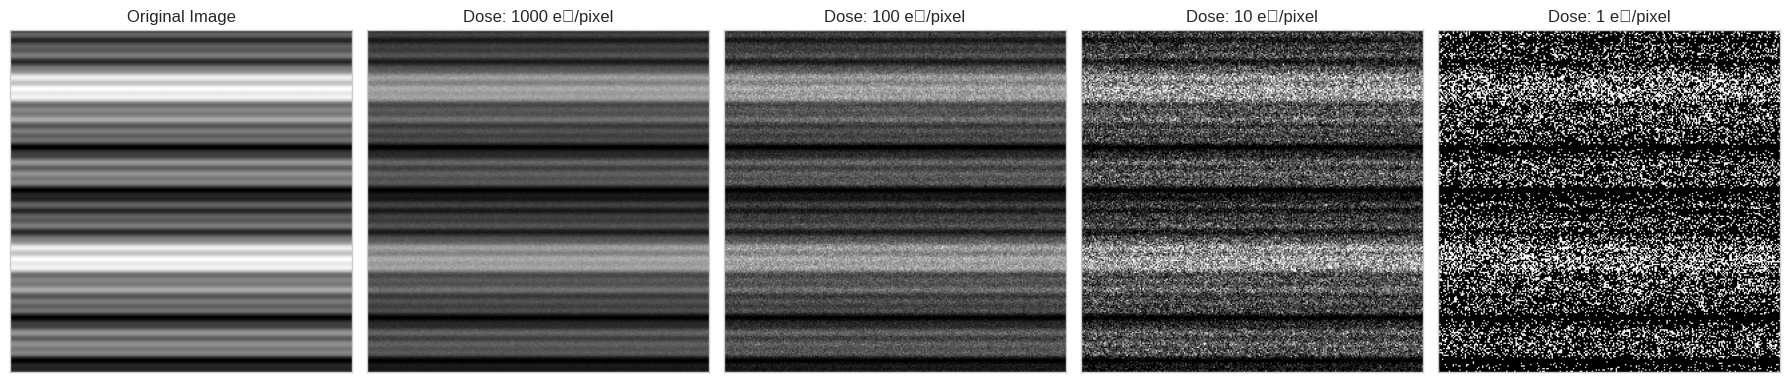

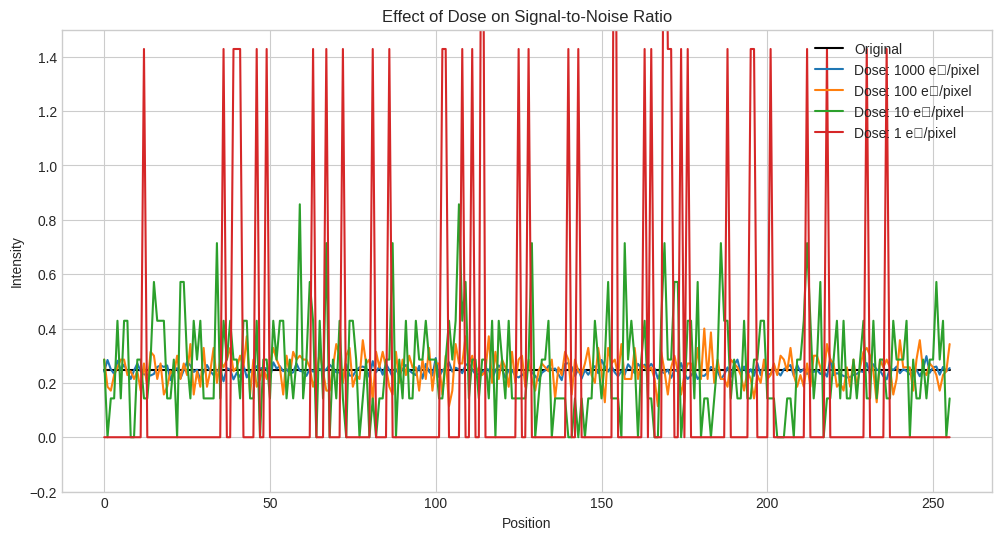

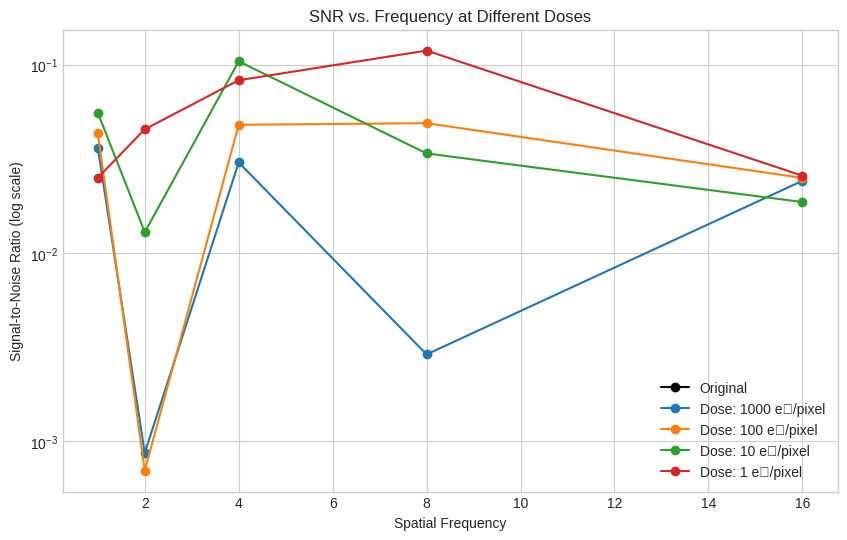

The resolution-dose tradeoff is fundamental in electron microscopy:
- Higher doses provide better SNR but can damage beam-sensitive samples
- Lower doses preserve the sample but result in noisier images
- Higher frequencies (finer details) require higher doses to achieve acceptable SNR

This is why cryo-EM and other low-dose techniques require:
1. High DQE detectors to maximize efficiency
2. Averaging multiple images to improve SNR
3. Optimal image processing to extract information from noisy data


In [23]:
def explore_resolution_dose_tradeoff():
    """Explore the practical tradeoff between resolution and dose"""
    
    # Create a simple test image with fine details
    size = 256
    test_image = np.zeros((size, size))
    
    # Add features of different sizes
    for i in range(5):
        frequency = 2**(i+1)  # Increasing frequencies
        phase = np.random.rand() * 2 * np.pi  # Random phase
        x = np.linspace(0, 2*np.pi, size)
        pattern = np.sin(frequency * x + phase)
        test_image += np.outer(pattern, np.ones(size)) * (0.8 ** i)  # Decreasing contrast
    
    # Normalize
    test_image = (test_image - np.min(test_image)) / (np.max(test_image) - np.min(test_image))
    
    # Define different electron doses
    doses = [1000, 100, 10, 1]  # electrons/pixel
    
    def simulate_imaging(image, dose, dqe=0.5):
        """Simulate electron microscopy image formation"""
        # Scale image to represent electron counts
        scaled_image = image * dose
        
        # Apply Poisson noise (electron counting statistics)
        detected_electrons = poisson(scaled_image * dqe)
        
        # Normalize back
        result = detected_electrons / (dose * dqe)
        
        return result
    
    # Apply different doses
    results = []
    for dose in doses:
        result = simulate_imaging(test_image, dose, dqe=0.7)
        results.append(result)
    
    # Plot results
    fig, axs = plt.subplots(1, 5, figsize=(18, 6))
    
    # Original image
    axs[0].imshow(test_image, cmap='gray')
    axs[0].set_title('Original Image')
    axs[0].set_xticks([])
    axs[0].set_yticks([])
    
    # Images at different doses
    for i, (dose, result) in enumerate(zip(doses, results)):
        axs[i+1].imshow(result, cmap='gray', vmin=0, vmax=1.5)
        axs[i+1].set_title(f'Dose: {dose} e⁻/pixel')
        axs[i+1].set_xticks([])
        axs[i+1].set_yticks([])
    
    plt.tight_layout()
    plt.show()
    
    # Plot line profiles
    plt.figure(figsize=(12, 6))
    row = size // 2
    plt.plot(test_image[row, :], 'k-', label='Original')
    
    for dose, result in zip(doses, results):
        plt.plot(result[row, :], label=f'Dose: {dose} e⁻/pixel')
    
    plt.legend()
    plt.title('Effect of Dose on Signal-to-Noise Ratio')
    plt.xlabel('Position')
    plt.ylabel('Intensity')
    plt.ylim(-0.2, 1.5)
    plt.show()
    
    # Calculate SNR at different frequencies and doses
    def calculate_frequency_snr(images, frequencies=[1, 2, 4, 8, 16]):
        """Calculate SNR at different frequencies"""
        snrs = []
        
        # Create reference signals at different frequencies
        size = images[0].shape[0]
        x = np.linspace(0, 2*np.pi, size)
        
        for freq in frequencies:
            signal = np.sin(freq * x)
            
            # Calculate SNR for each image
            image_snrs = []
            for img in images:
                # Extract row from middle of image
                row = size // 2
                profile = img[row, :]
                
                # Calculate correlation with reference signal
                corr = np.abs(np.sum(profile * signal)) / size
                
                # Calculate noise level (standard deviation)
                noise = np.std(profile - np.mean(profile))
                
                # SNR
                snr = corr / noise if noise > 0 else float('inf')
                image_snrs.append(snr)
            
            snrs.append(image_snrs)
        
        return np.array(snrs)
    
    # Calculate SNR at different frequencies and doses
    frequencies = [1, 2, 4, 8, 16]
    snrs = calculate_frequency_snr([test_image] + results, frequencies)
    
    # Plot SNR vs Frequency for different doses
    plt.figure(figsize=(10, 6))
    
    plt.plot(frequencies, snrs[:, 0], 'k-o', label='Original')
    for i, dose in enumerate(doses):
        plt.plot(frequencies, snrs[:, i+1], '-o', label=f'Dose: {dose} e⁻/pixel')
    
    plt.xlabel('Spatial Frequency')
    plt.ylabel('Signal-to-Noise Ratio (log scale)')
    plt.title('SNR vs. Frequency at Different Doses')
    plt.legend()
    plt.grid(True)
    plt.yscale('log')
    plt.show()
    
    print("The resolution-dose tradeoff is fundamental in electron microscopy:")
    print("- Higher doses provide better SNR but can damage beam-sensitive samples")
    print("- Lower doses preserve the sample but result in noisier images")
    print("- Higher frequencies (finer details) require higher doses to achieve acceptable SNR")
    print("\nThis is why cryo-EM and other low-dose techniques require:")
    print("1. High DQE detectors to maximize efficiency")
    print("2. Averaging multiple images to improve SNR")
    print("3. Optimal image processing to extract information from noisy data")

# Execute the function
explore_resolution_dose_tradeoff()

## 7. Practical MTF and DQE Measurement

This section summarizes practical methods for measuring MTF and DQE in electron microscopy systems, including the knife-edge method, noise power spectrum analysis, and slanted edge techniques. It also compares different detector technologies and their performance characteristics.

Practical MTF Measurement Methods:
1. Knife-Edge Method:
   - Image a sharp edge
   - Extract Edge Spread Function (ESF)
   - Differentiate to get Line Spread Function (LSF)
   - Take FFT of LSF to get MTF

2. Noise Power Spectrum Method:
   - Acquire flat-field images (uniform illumination)
   - Calculate power spectrum of noise
   - MTF² = NPS_out / NPS_in (under certain assumptions)

3. Slanted Edge Method (ISO 12233):
   - Image a slightly slanted edge (a few degrees)
   - Allows super-resolution sampling of the edge
   - Extract ESF, then proceed as with knife-edge

Practical DQE Measurement Methods:
1. Basic Definition Method:
   - DQE(f) = SNR_out²(f) / SNR_in²(f)
   - Requires measuring input and output SNR at each frequency

2. Practical Formula:
   - DQE(f) = MTF²(f) / (NPS(f) * q)
   - where q is the input quanta per unit area
   - MTF(f) is the modulation transfer function
   - NPS(f) is the normalized noise power spectrum


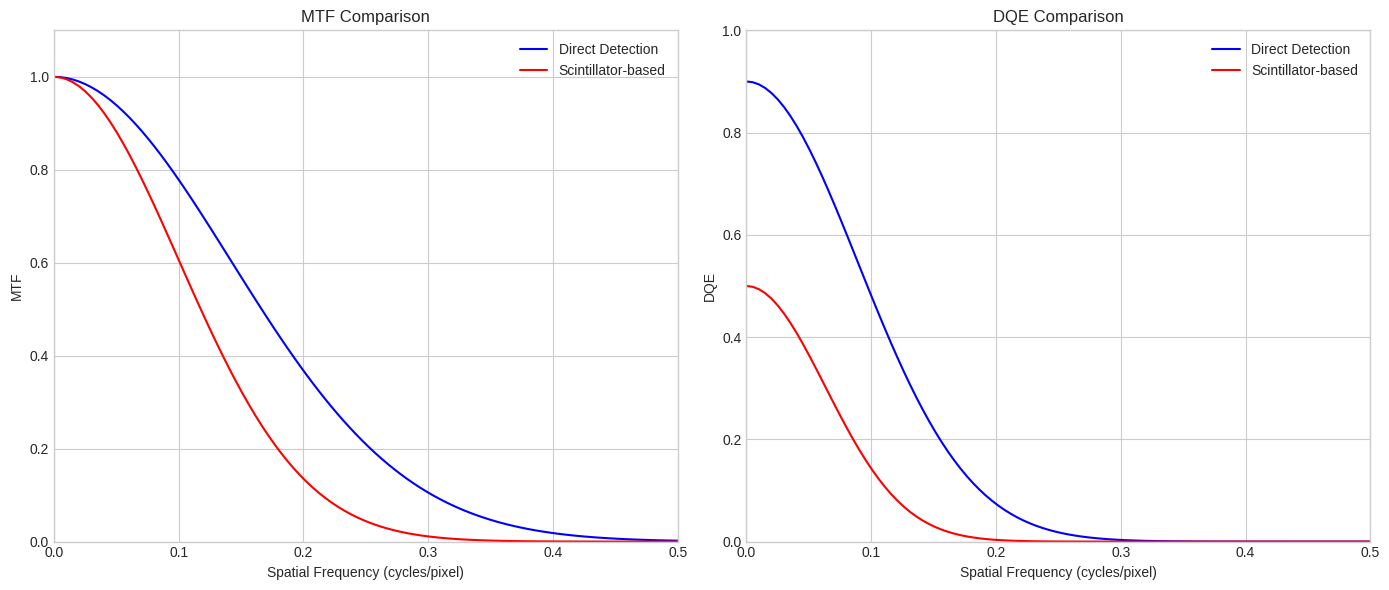


Modern Detector Technology Comparison:
1. Direct Electron Detectors (DED):
   - Electrons directly strike semiconductor
   - Minimal scattering/spreading of signal
   - Better MTF, especially at high frequencies
   - Higher DQE across all frequencies
   - Examples: Gatan K2/K3, Falcon, DE-series

2. Scintillator-based Detectors:
   - Electrons strike scintillator, producing light
   - Light is detected by CCD or CMOS sensor
   - Light spreading degrades MTF
   - Lower DQE, especially at high frequencies
   - Examples: Traditional CCD cameras

3. Counting vs. Integrating Mode:
   - Counting: Individual electrons detected and counted
   - Better DQE but limited count rate
   - Integrating: Total charge measured
   - Can handle higher dose rates but lower DQE
   - Super-resolution: Localize impact position within pixel


In [24]:

def practical_mtf_dqe_measurement():
    """Demonstrate practical methods for measuring MTF and DQE"""
    
    print("Practical MTF Measurement Methods:")
    print("1. Knife-Edge Method:")
    print("   - Image a sharp edge")
    print("   - Extract Edge Spread Function (ESF)")
    print("   - Differentiate to get Line Spread Function (LSF)")
    print("   - Take FFT of LSF to get MTF")
    print("\n2. Noise Power Spectrum Method:")
    print("   - Acquire flat-field images (uniform illumination)")
    print("   - Calculate power spectrum of noise")
    print("   - MTF² = NPS_out / NPS_in (under certain assumptions)")
    print("\n3. Slanted Edge Method (ISO 12233):")
    print("   - Image a slightly slanted edge (a few degrees)")
    print("   - Allows super-resolution sampling of the edge")
    print("   - Extract ESF, then proceed as with knife-edge")
    
    print("\nPractical DQE Measurement Methods:")
    print("1. Basic Definition Method:")
    print("   - DQE(f) = SNR_out²(f) / SNR_in²(f)")
    print("   - Requires measuring input and output SNR at each frequency")
    print("\n2. Practical Formula:")
    print("   - DQE(f) = MTF²(f) / (NPS(f) * q)")
    print("   - where q is the input quanta per unit area")
    print("   - MTF(f) is the modulation transfer function")
    print("   - NPS(f) is the normalized noise power spectrum")
    
    # Create a simulated MTF and DQE curve for a typical detector
    frequencies = np.linspace(0, 0.5, 100)  # Nyquist frequency = 0.5
    
    # Different MTF models
    mtf_direct = np.exp(-(frequencies**2) / 0.04)  # Direct detection
    mtf_scintillator = np.exp(-(frequencies**2) / 0.02)  # Scintillator-based
    
    # DQE models based on MTF and other factors
    dqe_direct = mtf_direct**2 * (0.9 * np.exp(-(frequencies**2) / 0.08))
    dqe_scintillator = mtf_scintillator**2 * (0.5 * np.exp(-(frequencies**2) / 0.04))
    
    # Plot MTF and DQE curves
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # MTF plot
    ax1.plot(frequencies, mtf_direct, 'b-', label='Direct Detection')
    ax1.plot(frequencies, mtf_scintillator, 'r-', label='Scintillator-based')
    ax1.set_title('MTF Comparison')
    ax1.set_xlabel('Spatial Frequency (cycles/pixel)')
    ax1.set_ylabel('MTF')
    ax1.legend()
    ax1.grid(True)
    ax1.set_xlim(0, 0.5)
    ax1.set_ylim(0, 1.1)
    
    # DQE plot
    ax2.plot(frequencies, dqe_direct, 'b-', label='Direct Detection')
    ax2.plot(frequencies, dqe_scintillator, 'r-', label='Scintillator-based')
    ax2.set_title('DQE Comparison')
    ax2.set_xlabel('Spatial Frequency (cycles/pixel)')
    ax2.set_ylabel('DQE')
    ax2.legend()
    ax2.grid(True)
    ax2.set_xlim(0, 0.5)
    ax2.set_ylim(0, 1.0)
    
    plt.tight_layout()
    plt.show()
    
    print("\nModern Detector Technology Comparison:")
    print("1. Direct Electron Detectors (DED):")
    print("   - Electrons directly strike semiconductor")
    print("   - Minimal scattering/spreading of signal")
    print("   - Better MTF, especially at high frequencies")
    print("   - Higher DQE across all frequencies")
    print("   - Examples: Gatan K2/K3, Falcon, DE-series")
    print("\n2. Scintillator-based Detectors:")
    print("   - Electrons strike scintillator, producing light")
    print("   - Light is detected by CCD or CMOS sensor")
    print("   - Light spreading degrades MTF")
    print("   - Lower DQE, especially at high frequencies")
    print("   - Examples: Traditional CCD cameras")
    print("\n3. Counting vs. Integrating Mode:")
    print("   - Counting: Individual electrons detected and counted")
    print("   - Better DQE but limited count rate")
    print("   - Integrating: Total charge measured")
    print("   - Can handle higher dose rates but lower DQE")
    print("   - Super-resolution: Localize impact position within pixel")

# Execute the function
practical_mtf_dqe_measurement()

## 8. Case Study: Resolution Improvement through MTF Correction

Once we know a system's MTF, we can apply correction algorithms to partially restore attenuated frequencies. This section demonstrates MTF correction using the Wiener filter approach, showing both its benefits in resolution enhancement and limitations due to noise amplification.

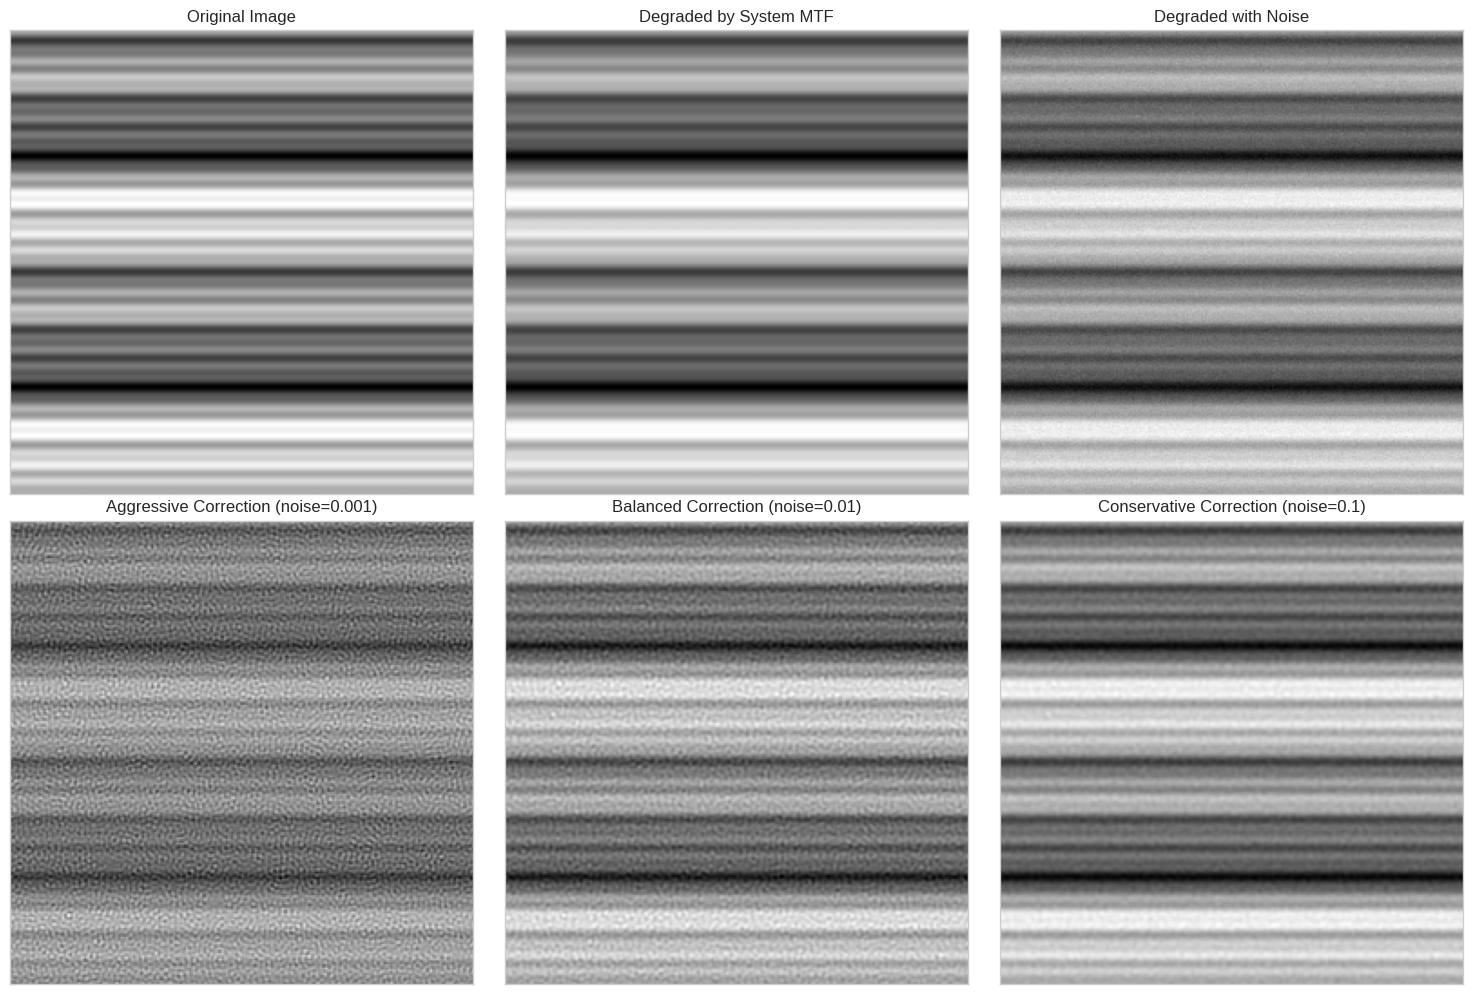

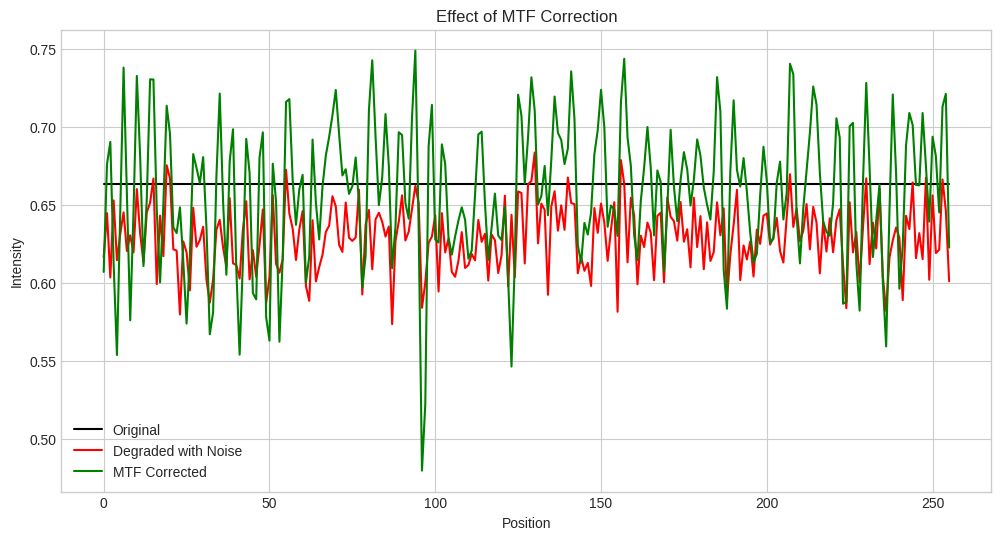

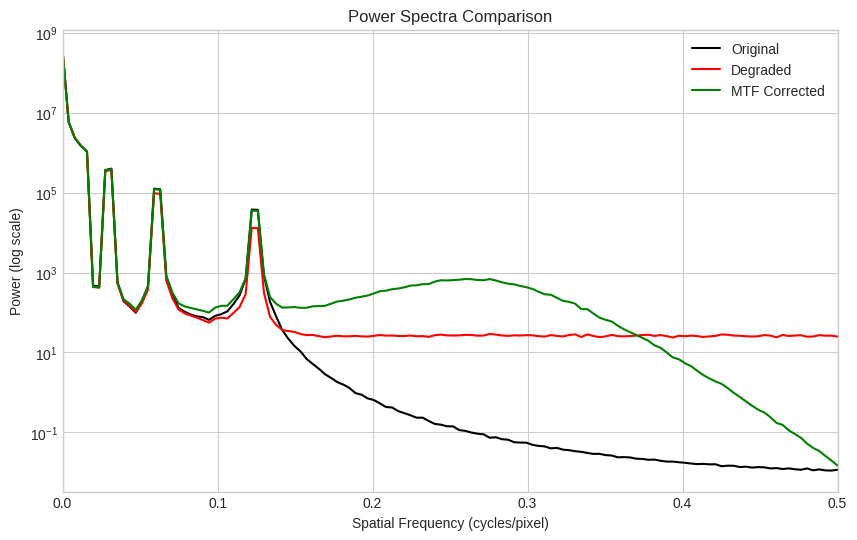

MTF Correction can improve effective resolution:
1. The system MTF attenuates high frequencies (fine details)
2. MTF correction boosts these frequencies back up
3. However, noise is also amplified, creating a tradeoff

The Wiener filter optimizes this tradeoff:
- Less aggressive in regions where noise dominates signal
- More aggressive where signal is strong
- The 'noise level' parameter controls the balance

In practice, MTF correction is part of a complete image processing workflow:
- Motion correction
- CTF (Contrast Transfer Function) estimation and correction
- MTF correction
- Noise filtering/denoising
- Particle picking/feature detection


In [9]:

def mtf_correction_demo():
    """Demonstrate how MTF correction can improve effective resolution"""
    
    # Create a test image with fine details
    size = 256
    test_image = np.zeros((size, size))
    
    # Add features of different sizes
    for i in range(5):
        frequency = 2**(i+1)  # Increasing frequencies
        phase = np.random.rand() * 2 * np.pi  # Random phase
        x = np.linspace(0, 2*np.pi, size)
        pattern = np.sin(frequency * x + phase)
        test_image += np.outer(pattern, np.ones(size)) * (0.8 ** i)  # Decreasing contrast
    
    # Normalize
    test_image = (test_image - np.min(test_image)) / (np.max(test_image) - np.min(test_image))
    
    # Define system MTF
    def create_system_mtf(size):
        """Create system MTF (Gaussian model)"""
        freq_x = np.linspace(-0.5, 0.5, size)
        freq_y = np.linspace(-0.5, 0.5, size)
        FX, FY = np.meshgrid(freq_x, freq_y)
        freq_radius = np.sqrt(FX**2 + FY**2)
        
        # Gaussian MTF model
        mtf = np.exp(-(freq_radius**2) / 0.03)
        return mtf
    
    # Apply system MTF to degrade image
    def apply_mtf(image, mtf):
        """Apply MTF to image in frequency domain"""
        # Transform to frequency domain
        img_freq = fftshift(fft2(image))
        
        # Apply MTF
        img_freq_degraded = img_freq * mtf
        
        # Transform back to spatial domain
        result = np.real(ifft2(ifftshift(img_freq_degraded)))
        
        return result
    
    # Create MTF for the system
    system_mtf = create_system_mtf(size)
    
    # Degrade image with system MTF
    degraded_image = apply_mtf(test_image, system_mtf)
    
    # Add noise to simulate realistic conditions
    degraded_noisy = degraded_image + np.random.normal(0, 0.02, degraded_image.shape)
    
    # Define Wiener filter for MTF correction
    def mtf_correction_wiener(image, mtf, noise_level=0.01):
        """Apply Wiener filter for MTF correction"""
        # Transform to frequency domain
        img_freq = fftshift(fft2(image))
        
        # Wiener filter
        wiener_filter = np.conj(mtf) / (np.abs(mtf)**2 + noise_level)
        
        # Apply filter
        img_freq_corrected = img_freq * wiener_filter
        
        # Transform back to spatial domain
        result = np.real(ifft2(ifftshift(img_freq_corrected)))
        
        return result
    
    # Apply MTF correction with different noise parameter values
    corrected_low = mtf_correction_wiener(degraded_noisy, system_mtf, noise_level=0.001)
    corrected_medium = mtf_correction_wiener(degraded_noisy, system_mtf, noise_level=0.01)
    corrected_high = mtf_correction_wiener(degraded_noisy, system_mtf, noise_level=0.1)
    
    # Plot results
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    
    # Original and degraded images
    axs[0, 0].imshow(test_image, cmap='gray')
    axs[0, 0].set_title('Original Image')
    axs[0, 0].set_xticks([])
    axs[0, 0].set_yticks([])
    
    axs[0, 1].imshow(degraded_image, cmap='gray')
    axs[0, 1].set_title('Degraded by System MTF')
    axs[0, 1].set_xticks([])
    axs[0, 1].set_yticks([])
    
    axs[0, 2].imshow(degraded_noisy, cmap='gray')
    axs[0, 2].set_title('Degraded with Noise')
    axs[0, 2].set_xticks([])
    axs[0, 2].set_yticks([])
    
    # Corrected images with different parameters
    axs[1, 0].imshow(corrected_low, cmap='gray')
    axs[1, 0].set_title('Aggressive Correction (noise=0.001)')
    axs[1, 0].set_xticks([])
    axs[1, 0].set_yticks([])
    
    axs[1, 1].imshow(corrected_medium, cmap='gray')
    axs[1, 1].set_title('Balanced Correction (noise=0.01)')
    axs[1, 1].set_xticks([])
    axs[1, 1].set_yticks([])
    
    axs[1, 2].imshow(corrected_high, cmap='gray')
    axs[1, 2].set_title('Conservative Correction (noise=0.1)')
    axs[1, 2].set_xticks([])
    axs[1, 2].set_yticks([])
    
    plt.tight_layout()
    plt.show()
    
    # Plot line profiles for comparison
    plt.figure(figsize=(12, 6))
    row = size // 2
    plt.plot(test_image[row, :], 'k-', label='Original')
    plt.plot(degraded_noisy[row, :], 'r-', label='Degraded with Noise')
    plt.plot(corrected_medium[row, :], 'g-', label='MTF Corrected')
    plt.legend()
    plt.title('Effect of MTF Correction')
    plt.xlabel('Position')
    plt.ylabel('Intensity')
    plt.show()
    
    # Calculate and plot power spectra
    def calculate_power_spectrum(image):
        """Calculate radially averaged power spectrum"""
        # Calculate 2D power spectrum
        ps2d = np.abs(fftshift(fft2(image)))**2
        
        # Create radius coordinates
        y, x = np.indices(ps2d.shape)
        center = np.array([(x.max() - x.min()) / 2.0, (y.max() - y.min()) / 2.0])
        r = np.hypot(x - center[0], y - center[1])
        
        # Convert to integer indices
        r = r.astype(int)
        
        # Sum over radius bins
        tbin = np.bincount(r.ravel(), ps2d.ravel())
        nr = np.bincount(r.ravel())
        radial_ps = tbin / nr
        
        return radial_ps[:size//2]
    
    # Calculate power spectra
    ps_original = calculate_power_spectrum(test_image)
    ps_degraded = calculate_power_spectrum(degraded_noisy)
    ps_corrected = calculate_power_spectrum(corrected_medium)
    
    # Plot power spectra
    plt.figure(figsize=(10, 6))
    freq = np.linspace(0, 0.5, len(ps_original))
    plt.semilogy(freq, ps_original, 'k-', label='Original')
    plt.semilogy(freq, ps_degraded, 'r-', label='Degraded')
    plt.semilogy(freq, ps_corrected, 'g-', label='MTF Corrected')
    plt.legend()
    plt.title('Power Spectra Comparison')
    plt.xlabel('Spatial Frequency (cycles/pixel)')
    plt.ylabel('Power (log scale)')
    plt.grid(True)
    plt.xlim(0, 0.5)
    plt.show()
    
    print("MTF Correction can improve effective resolution:")
    print("1. The system MTF attenuates high frequencies (fine details)")
    print("2. MTF correction boosts these frequencies back up")
    print("3. However, noise is also amplified, creating a tradeoff")
    print("\nThe Wiener filter optimizes this tradeoff:")
    print("- Less aggressive in regions where noise dominates signal")
    print("- More aggressive where signal is strong")
    print("- The 'noise level' parameter controls the balance")
    print("\nIn practice, MTF correction is part of a complete image processing workflow:")
    print("- Motion correction")
    print("- CTF (Contrast Transfer Function) estimation and correction")
    print("- MTF correction")
    print("- Noise filtering/denoising")
    print("- Particle picking/feature detection")

# Execute the function
mtf_correction_demo()

## 9. Conclusion and Practical Considerations

This final section summarizes key takeaways about MTF and DQE in electron microscopy, provides practical considerations for optimizing imaging conditions, and suggests resources for further learning and experimentation.

In [10]:

def conclusion():
    """Summarize key points and practical considerations"""
    
    print("Key Takeaways:")
    print("\n1. MTF (Modulation Transfer Function):")
    print("   - Measures how faithfully an imaging system transfers contrast across spatial frequencies")
    print("   - Lower MTF at higher frequencies means loss of fine details")
    print("   - Can be measured using knife-edge, slanted edge, or noise power spectrum methods")
    print("   - MTF correction can restore some lost resolution but amplifies noise")
    
    print("\n2. DQE (Detective Quantum Efficiency):")
    print("   - Measures detector's efficiency in converting input signal (electrons) to useful output")
    print("   - DQE = (SNR_out²) / (SNR_in²)")
    print("   - Frequency-dependent: typically highest at low frequencies")
    print("   - Critical for low-dose imaging (beam-sensitive specimens)")
    
    print("\n3. Resolution-Dose Tradeoff:")
    print("   - Higher resolution (finer details) requires higher dose")
    print("   - But higher dose damages sensitive specimens")
    print("   - High DQE detectors help minimize this tradeoff")
    print("   - Image averaging and processing can further improve SNR")
    
    print("\n4. Modern Detection Technologies:")
    print("   - Direct electron detectors offer superior MTF and DQE")
    print("   - Counting mode provides better DQE but limited count rate")
    print("   - Super-resolution can overcome Nyquist limit by localizing impact position")
    
    print("\n5. Practical Considerations:")
    print("   - Know your detector's MTF and DQE characteristics")
    print("   - Balance dose with sample damage considerations")
    print("   - Choose appropriate defocus for phase contrast")
    print("   - Consider frame-alignment for motion correction")
    print("   - Apply appropriate image processing (CTF correction, MTF correction, denoising)")
    
    print("\nFurther Learning Resources:")
    print("1. Textbooks:")
    print("   - 'Transmission Electron Microscopy' by Williams & Carter")
    print("   - 'Electron Microscopy: Principles and Techniques for Biologists' by Bozzola & Russell")
    
    print("\n2. Research Papers:")
    print("   - McMullan et al. 'Comparison of optimal performance at 300 keV of three direct electron detectors for use in low dose electron microscopy'")
    print("   - Ruskin et al. 'Quantitative Characterization of Electron Detectors for Transmission Electron Microscopy'")
    
    print("\n3. Software and Tools:")
    print("   - CTFFIND4: CTF estimation")
    print("   - MotionCor2: Motion correction")
    print("   - RELION, cryoSPARC: Image processing pipelines for single-particle analysis")
    print("   - ImageJ/Fiji: General image analysis with TEM plugins")
    
    print("\nPractical Exercises:")
    print("1. Measure your microscope's MTF using the knife-edge method")
    print("2. Evaluate how SNR changes with dose in your system")
    print("3. Compare images before and after MTF correction")
    print("4. Explore the effect of defocus on contrast and resolution")

# Execute the conclusion
conclusion()

Key Takeaways:

1. MTF (Modulation Transfer Function):
   - Measures how faithfully an imaging system transfers contrast across spatial frequencies
   - Lower MTF at higher frequencies means loss of fine details
   - Can be measured using knife-edge, slanted edge, or noise power spectrum methods
   - MTF correction can restore some lost resolution but amplifies noise

2. DQE (Detective Quantum Efficiency):
   - Measures detector's efficiency in converting input signal (electrons) to useful output
   - DQE = (SNR_out²) / (SNR_in²)
   - Frequency-dependent: typically highest at low frequencies
   - Critical for low-dose imaging (beam-sensitive specimens)

3. Resolution-Dose Tradeoff:
   - Higher resolution (finer details) requires higher dose
   - But higher dose damages sensitive specimens
   - High DQE detectors help minimize this tradeoff
   - Image averaging and processing can further improve SNR

4. Modern Detection Technologies:
   - Direct electron detectors offer superior MTF and

# Precise MTF/PSF Measurement Method Using Subpixel Sampling

## Overview

This method enables accurate measurement of a 1D pixelated sensor's Point Spread Function (PSF) and Modulation Transfer Function (MTF) using a practical approximation of an ideal point source, combined with subpixel positioning and deconvolution techniques.

## Input Source Characteristics

Instead of an ideal delta function (which is theoretically impossible to produce), the measurement uses:

- A narrow, approximately Gaussian-shaped peak with a Full Width at Half Maximum (FWHM) of approximately 1.2 pixels
- This peak serves as a practical approximation of a point source
- The exact shape of this peak is precisely characterized at high resolution before being used for sensor measurements

## Subpixel Sampling Approach

To overcome the spatial resolution limitations of the sensor:

1. The peak is positioned with high precision using a fine-movement stage
2. Measurements are taken at multiple subpixel positions
3. The peak is shifted in increments of 1/16th of a pixel width across the entire pixel
4. At each position, the sensor response is recorded
5. These multiple measurements are combined to create an upsampled (16× higher resolution) representation of the sensor's response

## Measurement Procedure

1. **High-Resolution Reference Measurement**:
   - The input peak is characterized using a high-resolution detector or method
   - This creates a precise reference profile of the input peak at 16× the pixel resolution
   - This reference is stored as the known input source shape

2. **Sensor Response Measurement**:
   - The peak is positioned at the first subpixel position
   - The sensor response is recorded
   - The peak is shifted by 1/16th of a pixel
   - This process is repeated until 16 evenly-spaced positions across one pixel width are measured
   - For robust results, this process may be repeated across multiple pixels with results averaged

3. **Data Combination**:
   - The 16 measurements are interleaved according to their precise positions
   - This creates an upsampled representation of the sensor's response to the peak
   - The result is the convolution of the sensor's true PSF with the input peak shape

## Deconvolution Process

To recover the true sensor PSF from the measured response:

1. **Conversion to Frequency Domain**:
   - Fast Fourier Transform (FFT) is applied to both:
     - The upsampled sensor response measurements
     - The high-resolution reference profile of the input peak

2. **Deconvolution by Division**:
   - In the frequency domain, the FFT of the measured response is divided by the FFT of the reference peak profile
   - This division effectively removes the contribution of the input peak shape
   - The result represents the frequency response (MTF) of the sensor alone

3. **Conversion Back to Spatial Domain** (if PSF is desired):
   - Inverse Fast Fourier Transform (IFFT) is applied to the result
   - This yields the true PSF of the sensor system

## Mathematical Representation

The process follows these mathematical principles:

1. **Measurement Physics**:
   - Measured response = Sensor PSF ⊗ Input peak  
     (where ⊗ represents convolution)

2. **Frequency Domain Transformation**:
   - FFT(Measured response) = FFT(Sensor PSF) × FFT(Input peak)

3. **Deconvolution**:
   - FFT(Sensor PSF) = FFT(Measured response) ÷ FFT(Input peak)

4. **Recovery of Spatial PSF**:
   - Sensor PSF = IFFT[FFT(Measured response) ÷ FFT(Input peak)]

## Practical Considerations

### Noise Management
- The division in frequency space can amplify noise, especially at high frequencies where the input peak's FFT approaches zero
- Wiener filtering or similar regularization techniques should be applied to prevent noise amplification
- A frequency cutoff may be needed to limit the analysis to the reliable frequency range

### Signal-to-Noise Ratio
- Multiple measurements at each position can be averaged to improve SNR
- The intensity of the input peak should be optimized to utilize the full dynamic range of the sensor without saturation

### Positioning Accuracy
- The precise positioning of the peak is critical for accurate interleaving of measurements
- Any positioning errors should be characterized and included in the uncertainty analysis

### Edge Effects
- Windowing functions should be applied before FFT to minimize edge effects
- The measurement region should allow sufficient buffer around the peak to capture the full extent of the PSF

## Validation Approach

To verify the measurement accuracy:

1. Apply the measured PSF to the known input peak via convolution
2. Compare this synthetic result with the actual measured response
3. The difference between these should be minimal and primarily consist of random noise
4. Calculate the normalized root-mean-square error (NRMSE) as a quantitative validation metric

## Advantages of This Method

1. **Practicality**: Uses a realistic, producible light source rather than requiring an ideal delta function
2. **Enhanced Resolution**: Achieves effective sampling rate 16× higher than the native pixel resolution
3. **Accuracy**: Compensates for the non-ideal nature of the input source through deconvolution
4. **Direct MTF Access**: Provides direct measurement of the frequency response via the FFT division

This approach enables precise characterization of sensor performance metrics that would otherwise be limited by the discrete nature of the pixel array and the practical limitations of available light sources.

# Mathematical Formulation of Subpixel PSF/MTF Measurement

## 1. Definitions and Notation

- $h_\text{sensor}(x)$: True Point Spread Function (PSF) of the sensor
- $s(x)$: Input source peak shape (approximately Gaussian with FWHM ≈ 1.2 pixels)
- $r_i(x)$: Measured sensor response at subpixel position $i$
- $p$: Pixel pitch (distance between pixel centers)
- $\Delta x$: Subpixel step size $\left(\Delta x = \frac{p}{16}\right)$
- $x_i$: Position of the input peak for measurement $i$ $\left(x_i = i \cdot \Delta x\right)$ where $i \in \{0, 1, 2, ..., 15\}$
- $\mathcal{F}[\cdot]$: Fourier transform operator
- $\mathcal{F}^{-1}[\cdot]$: Inverse Fourier transform operator
- $H_\text{sensor}(f) = \mathcal{F}[h_\text{sensor}(x)]$: Optical Transfer Function (OTF)
- $|H_\text{sensor}(f)|$: Modulation Transfer Function (MTF)

## 2. Measurement Physics

For each subpixel position $i$, the measured sensor response $r_i(x)$ can be expressed as:

$$r_i(x) = [h_\text{sensor} \otimes s](x - x_i) + n_i(x)$$

Where $\otimes$ denotes convolution and $n_i(x)$ represents measurement noise.

## 3. Subpixel Sampling

The peak is shifted in increments of $\Delta x = \frac{p}{16}$ to obtain 16 measurements. Each measurement $r_i(x)$ is sampled at the pixel centers. For a sensor with pixels at positions $x_\text{pixel} = k \cdot p$ (where $k \in \mathbb{Z}$), the sampled values are:

$$r_i[k] = r_i(k \cdot p)$$

## 4. Interleaving for Upsampled Representation

The interleaved measurements are combined to create an upsampled representation $r_\text{up}[j]$ with 16× higher spatial resolution:

$$r_\text{up}[j] = r_{i}[k] \quad \text{where} \quad j = 16k + i$$

This effectively creates a signal sampled at positions $x_j = j \cdot \Delta x$.

## 5. Frequency Domain Analysis

### 5.1. Fourier Transform of Upsampled Response

$$R_\text{up}(f) = \mathcal{F}[r_\text{up}[j]]$$

### 5.2. Fourier Transform of Input Source

The high-resolution reference measurement of the input source peak yields:

$$S(f) = \mathcal{F}[s(x)]$$

### 5.3. Mathematical Basis for Deconvolution

In the spatial domain, the noiseless measurement is a convolution:

$$r_\text{ideal}(x) = h_\text{sensor}(x) \otimes s(x)$$

In the frequency domain, convolution becomes multiplication:

$$R_\text{ideal}(f) = H_\text{sensor}(f) \cdot S(f)$$

Therefore, to recover the sensor's OTF:

$$H_\text{sensor}(f) = \frac{R_\text{ideal}(f)}{S(f)}$$

## 6. Practical Deconvolution with Noise Handling

Since we have noise in real measurements, direct division can amplify noise at frequencies where $S(f)$ is small. We use a regularized approach:

$$H_\text{sensor}(f) = \frac{R_\text{up}(f) \cdot S^*(f)}{|S(f)|^2 + \beta(f)}$$

Where:
- $S^*(f)$ is the complex conjugate of $S(f)$
- $\beta(f)$ is a frequency-dependent regularization parameter, often chosen as $\beta(f) = \alpha \cdot |N(f)|^2/|S(f)|^2$ where $\alpha$ is a constant and $N(f)$ represents the noise power spectrum

## 7. MTF Calculation

The Modulation Transfer Function is the magnitude of the OTF:

$$\text{MTF}(f) = |H_\text{sensor}(f)|$$

## 8. Recovery of Spatial PSF

If needed, the spatial PSF can be recovered via inverse Fourier transform:

$$h_\text{sensor}(x) = \mathcal{F}^{-1}[H_\text{sensor}(f)]$$

## 9. Nyquist Limit and Frequency Range

The native Nyquist frequency of the sensor is:

$$f_\text{Nyquist} = \frac{1}{2p}$$

With 16× subpixel sampling, we can characterize frequencies up to:

$$f_\text{max} = \frac{1}{2\Delta x} = \frac{16}{2p} = 8 \cdot f_\text{Nyquist}$$

## 10. Error Analysis

### 10.1. Error Propagation

The uncertainty in the measured MTF can be estimated through error propagation:

$$\sigma^2_\text{MTF}(f) \approx \left|\frac{\partial \text{MTF}}{\partial R_\text{up}}\right|^2 \sigma^2_{R_\text{up}}(f) + \left|\frac{\partial \text{MTF}}{\partial S}\right|^2 \sigma^2_S(f)$$

### 10.2. Signal-to-Noise Ratio

The effective SNR of the deconvolved result varies with frequency:

$$\text{SNR}_\text{MTF}(f) = \frac{|H_\text{sensor}(f)|^2}{\sigma^2_\text{MTF}(f)}$$

## 11. Validation Metric

The normalized root-mean-square error (NRMSE) between the measured response and a synthetic response created by convolving the recovered PSF with the input source:

$$\text{NRMSE} = \frac{\sqrt{\frac{1}{N}\sum_{j=0}^{N-1} [r_\text{up}[j] - (h_\text{sensor} \otimes s)[j\Delta x]]^2}}{\max(r_\text{up}) - \min(r_\text{up})}$$

Where $N$ is the number of points in the upsampled representation.